<table align="center" width=100%>
  <tr>
      <td width="15%">
          <img src="hey.jpg">
      </td>
       <td>
        <div align="center">
           <font color="#21618C" size=24px>
           <b>Back Order Prediction
              </b>
              </font>
           </div>
       </td>
   </tr>
</table>

# Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis and Preparation](#data_preparation)**
      - 3.1 -[Understand the dataset](#understand_data)
      - 3.2 -[Treating Incorrect values](#treat_incorrect_values)
      - 3.3 -[Missing Values](#missing_values)
      - 3.4 -[Correlation](#correlation)
      - 3.5 -[Analyze Categorical Variables](#analyse)
      - 3.6 -[Distribution of numerical variables](#distribution)
      - 3.8 -[Univariate Analysis](#univariate)
      - 3.9 -[Bivariate Analysis](#bivariate)
4. **[Statsitical test](#testing)**
5. **[Base Model building](#model_building)**
6. **[Feature Engineering](#feature_engineering)**
7. **[Handling imbalanced target](#handling_imbalance)**
8. **[Model Building](#Modelbuilding)**
      - 8.1 -[Logistic Regression](#withsmote)
      - 8.2 -[Decision Tree](#decision_tree)
      - 8.3 -[Random Forest Classifier](#random_forest_classifier)
      - 8.4 -[Adaboost](#adaboost)
      - 8.5 -[Gradient_Boosting Classifier](#GradientBoostingClassifier)
      - 8.6 -[XGBoost](#XGBoost)
9. **[Feature Importance](#feature_importance)**
10. **[Hyperparameter Tuning](#hyperparameter_tuning)**

## 1.Import Libraries

**Let us import the required libraries and functions**

In [27]:
#Importing all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15,8]
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.preprocessing import PowerTransformer
import random


from scipy.stats import jarque_bera,mannwhitneyu,ttest_ind
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import cohen_kappa_score


In [28]:
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import train_test_split
from statsmodels.stats import weightstats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# <a id='Read_Data'></a>
## 2. Read Data

In [30]:
#Importing the data file into a variable named df and displaying the top 5 rows

df1 = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

df1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


**Check number of rows and columns present in dataset**

In [31]:
df=df1.copy()
df2=df1.copy()

In [32]:
print('Number of rows in our data set is',df.shape[0])
print('Number of columns in our data set is',df.shape[1])

Number of rows in our data set is 242076
Number of columns in our data set is 23


# <a id='data_preparation'></a>
## 3. Data Analysis and Preparation

#  <a id='understand_data'></a>
### 3.1. Understand the dataset 

<a id='Data_Shape'></a>
####  Data Dimension

In [33]:
df.shape

(242076, 23)

We see the dataframe has 23 columns and 242076 observations.

### Check the datatypes

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242076 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                242076 non-null  object 
 1   national_inv       242075 non-null  float64
 2   lead_time          227351 non-null  float64
 3   in_transit_qty     242075 non-null  float64
 4   forecast_3_month   242075 non-null  float64
 5   forecast_6_month   242075 non-null  float64
 6   forecast_9_month   242075 non-null  float64
 7   sales_1_month      242075 non-null  float64
 8   sales_3_month      242075 non-null  float64
 9   sales_6_month      242075 non-null  float64
 10  sales_9_month      242075 non-null  float64
 11  min_bank           242075 non-null  float64
 12  potential_issue    242075 non-null  object 
 13  pieces_past_due    242075 non-null  float64
 14  perf_6_month_avg   242075 non-null  float64
 15  perf_12_month_avg  242075 non-null  float64
 16  lo

As we can see from the above output that there are total 8 categorical columns and 15 numerical columns in our data set
Also we can see that that though sku contains numerical values but still its data type is object because its unique 
product ID.

### Checking the statistical summary of our data set(numerical variables)

In [35]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
national_inv,242075.0,499.751028,29280.390793,-25414.0,4.00,15.00,81.00,12145792.0
lead_time,227351.0,7.923018,7.041410,0.0,4.00,8.00,9.00,52.0
in_transit_qty,242075.0,36.178213,898.673127,0.0,0.00,0.00,0.00,265272.0
forecast_3_month,242075.0,181.472345,5648.874620,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,242075.0,348.807304,10081.797119,0.0,0.00,0.00,12.00,2157024.0
forecast_9_month,242075.0,508.296301,14109.723787,0.0,0.00,0.00,20.00,3162260.0
sales_1_month,242075.0,51.478195,1544.678350,0.0,0.00,0.00,4.00,349620.0
sales_3_month,242075.0,172.139316,5164.243624,0.0,0.00,1.00,14.00,1099852.0
sales_6_month,242075.0,340.425414,9386.523492,0.0,0.00,2.00,30.00,2103389.0
sales_9_month,242075.0,511.775446,13976.702192,0.0,0.00,4.00,46.00,3195211.0


####  Hence we can observe from the above output that there are some null values in our dataset and also we can see that there are columns having negative minimum values. For the national inventory column we can say that negative inventory may arise due to machine or human error. It may also occur when a shipment is recorded as complete before it arrives. But we cannot say comment anything on the negative values for perf_6_months_avg and perf_12_months_avg so we'll negate that part of our dataframe.

**Checking for duplicate rows**

In [36]:
#Checking for duplicate rows
df[df.duplicated()]

#Hence as we can see that there are no duplicate rows in our data set.Hence one assumption for our logistic regression
#model is fulfilled

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


### Checking the statistical summary of our data set(categorical variables)

In [37]:
df.describe(include = object).T

,count,unique,top,freq
sku,242076,242076,3285085,1
potential_issue,242075,2,No,241993
deck_risk,242075,2,No,194105
oe_constraint,242075,2,No,242028
ppap_risk,242075,2,No,213357
stop_auto_buy,242075,2,Yes,232617
rev_stop,242075,2,No,241967
went_on_backorder,242075,2,No,239387


From the above summary statistic we can see that only for one column the 'Yes' has the highest frequency but apart from that we have only 'No'as the highest frequency.Also if we closely observe the frequency values from the summary statistic table of the categorical variables then the frequencies occuring are very high.Hence we can understand from this that our categorical columns are imbalanced.

#  <a id='treat_incorrect_values'></a>
### 3.2.  Treating Incorrect values

In [38]:
df=df[(df['perf_12_month_avg']!=-99) & (df['perf_6_month_avg']!=-99)]
df.shape

(222975, 23)

In [39]:
df.reset_index(drop=True,inplace=True)
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
1,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
2,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
3,3285960,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,No,0.0,0.37,0.68,0.0,No,No,No,Yes,No,No
4,3288094,208.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.66,0.64,0.0,No,No,No,Yes,No,No


#  <a id='missing_values'></a>
### 3.3. Missing Values 

In [40]:
#Lets check for null values presence 

Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

missing_data_info = pd.concat([Total, Percent], axis = 1, keys = ['Total_missing_values', 'Percentage of Missing Values'])    
missing_data_info

,Total_missing_values,Percentage of Missing Values
min_bank,1,0.000448
potential_issue,1,0.000448
rev_stop,1,0.000448
stop_auto_buy,1,0.000448
ppap_risk,1,0.000448
oe_constraint,1,0.000448
deck_risk,1,0.000448
local_bo_qty,1,0.000448
perf_12_month_avg,1,0.000448
perf_6_month_avg,1,0.000448


**Missing value treatment**

In [41]:
df.dropna(axis=0,inplace=True)
#Here we are dropping the last row which has all null values

In [42]:
#Checking the shape after treating all the null values
df.shape

(222974, 23)

After removing the missing values we have 222974 observation.

**Check for missing values**

In [43]:
Total=df.isna().sum().sort_values(ascending=False)
Percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([Total,Percent],axis=1,keys = ['Total_missing_values', 'Percentage of Missing Values'])
missing_data

,Total_missing_values,Percentage of Missing Values
sku,0,0.0
potential_issue,0,0.0
rev_stop,0,0.0
stop_auto_buy,0,0.0
ppap_risk,0,0.0
oe_constraint,0,0.0
deck_risk,0,0.0
local_bo_qty,0,0.0
perf_12_month_avg,0,0.0
perf_6_month_avg,0,0.0


So we treated the missing values

#  <a id='correlation'></a>
### 3.4. Correlation 

Here we are checking out how is the correlation among the numerical variables 

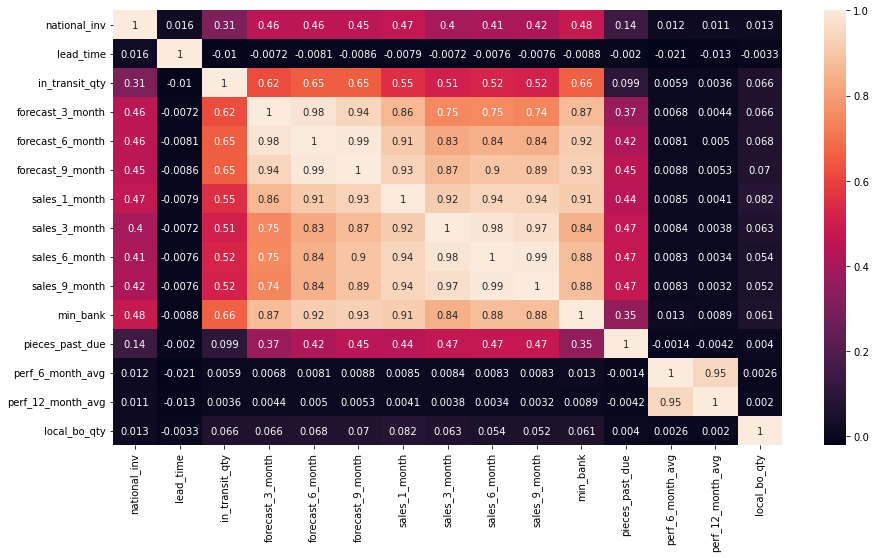

In [44]:
sns.heatmap(df.corr(),annot = True)
plt.show()

Now as we can see some of the columns are pretty strongly correlated among each other and hence we can say that there
might be multicollinearity problem in our data 

#  <a id='analyse'></a>
### 3.5. Analyze Categorical Variables 

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with count plots and pie chart.

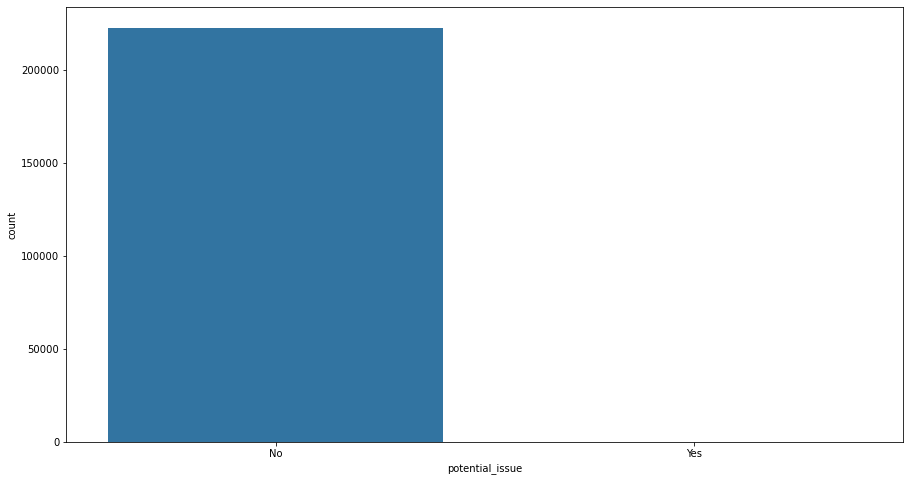

In [45]:
sns.countplot(data = df , x = 'potential_issue')
plt.show()

Now from the graph we can see that all the rows have only 'No' in potential_issue column but lets check manually too
(We can also visualize with the help of a pie chart)

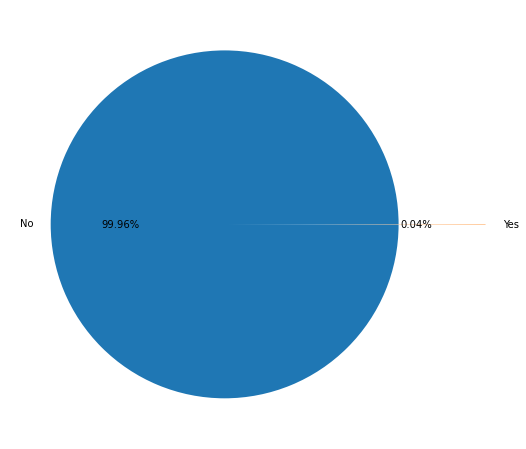

In [46]:
plt.pie(x = df['potential_issue'].value_counts().values , 
        labels = df['potential_issue'].value_counts().index,
        autopct = '%.2f%%',explode = [0,0.5] )
plt.show()

we can observe from the above pie chart that only 0.04% data is Yes for the 'potential_issue' column

Hence as we can see that the column potential_issue is highly imbalanced because out of all the rows only 82 has Yes and 
the rest has No

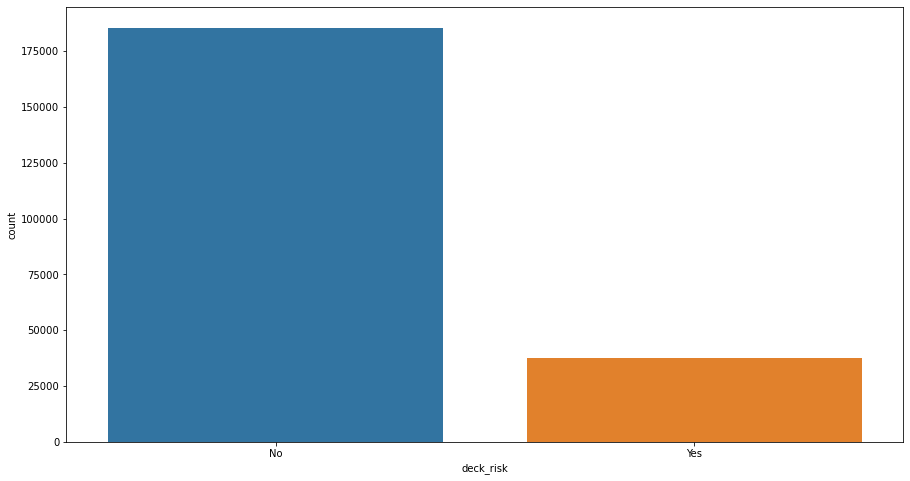

In [47]:
sns.countplot(data = df , x = 'deck_risk')
plt.show()

Hence this column is biased since there is still a lot of difference between the number of Yes and No in our 
deck_risk column

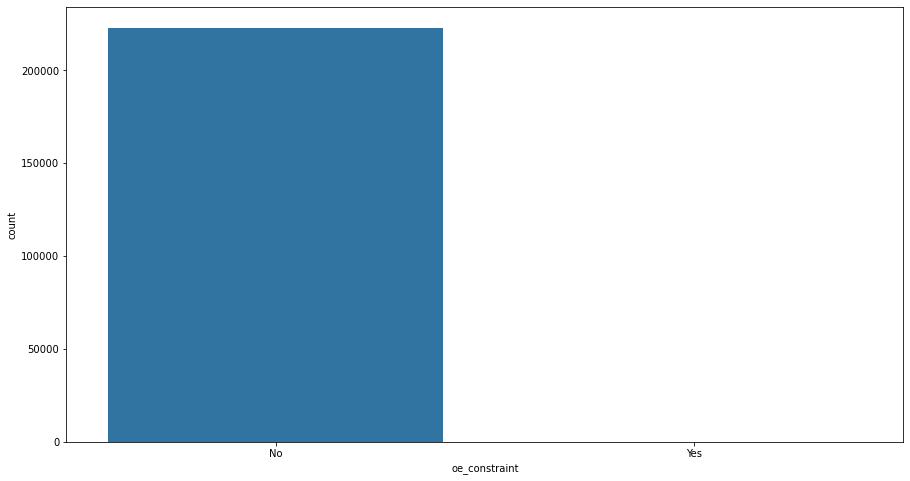

In [48]:
sns.countplot(data = df , x = 'oe_constraint')
plt.show()

Again we'll need to check manually and also with a pie chart 

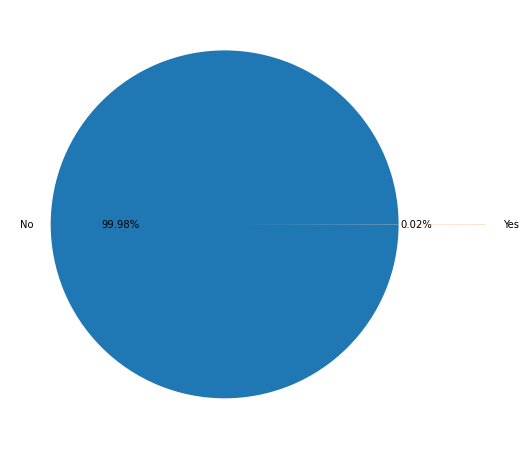

In [49]:
plt.pie(x = df['oe_constraint'].value_counts().values , 
        labels = df['oe_constraint'].value_counts().index,autopct = '%.2f%%',explode = [0,0.5] )
plt.show()

Hence we can observe from the above pie chart that only 0.02% data is Yes for the 'oe_constraint' column

In [50]:
len(df[df['oe_constraint'] == 'Yes'])

47

In [51]:
len(df[df['oe_constraint'] == 'No'])

222927

Again we can observe from the above two outputs that the oe_constraint column is also highly imbalanced

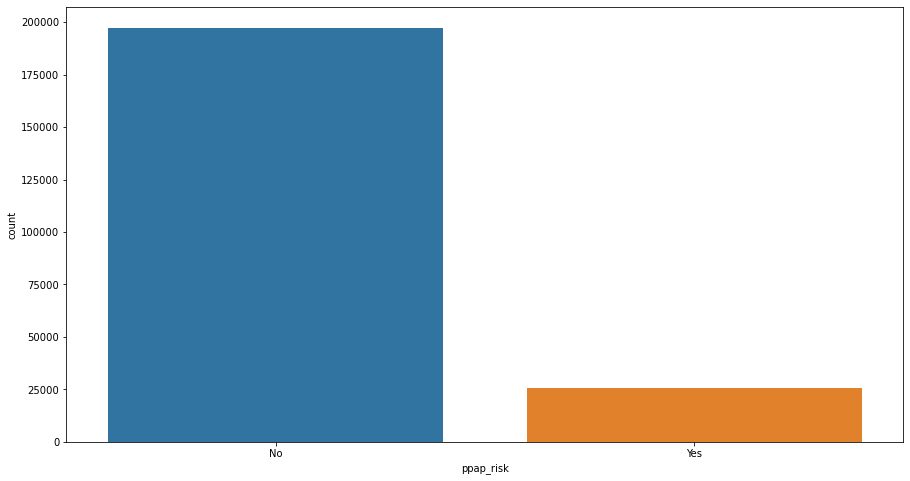

In [52]:
sns.countplot(data = df , x = 'ppap_risk')
plt.show()

This is also a biased column

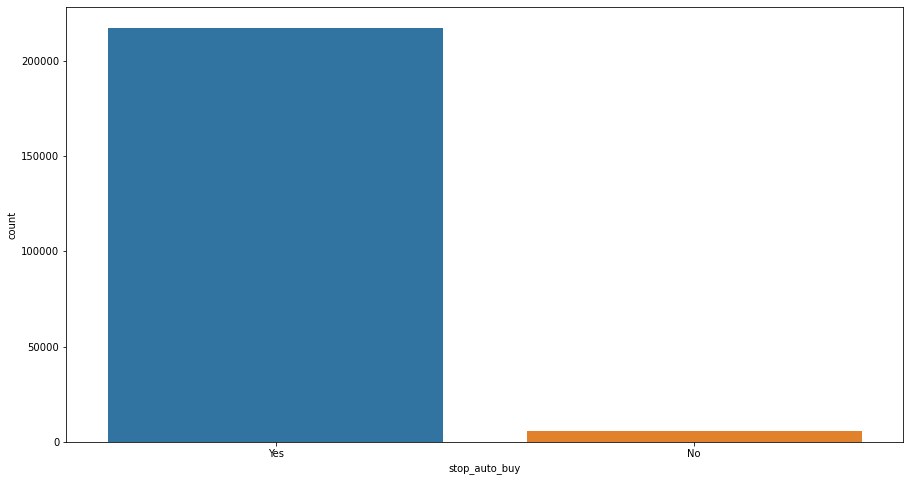

In [53]:
sns.countplot(data = df , x = 'stop_auto_buy')
plt.show()

This again is a biased column

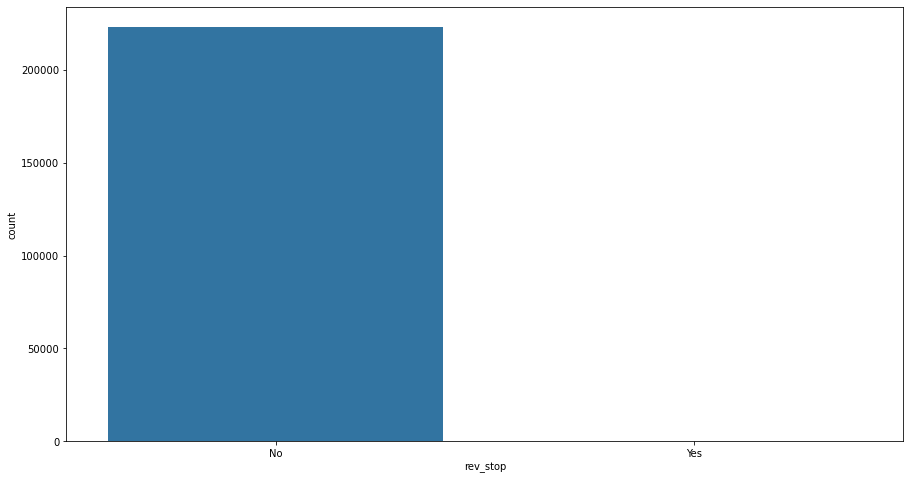

In [54]:
sns.countplot(data = df , x = 'rev_stop')
plt.show()

Agian we'll need to check manually and also with a pie chart 

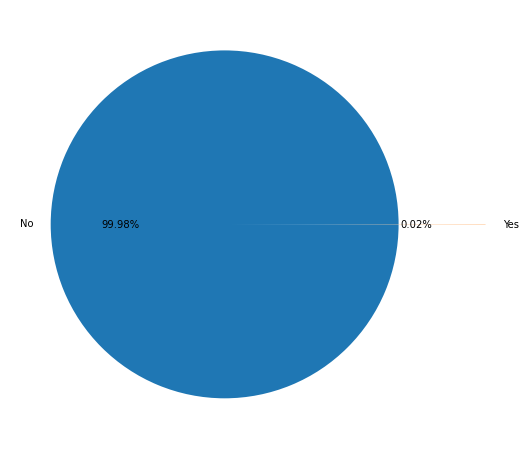

In [55]:
plt.pie(x = df['rev_stop'].value_counts().values , 
        labels = df['rev_stop'].value_counts().index,autopct = '%.2f%%',explode = [0,0.5] )
plt.show()

Hence we can observe from the above pie chart that only 0.03% data is Yes for the 'rev_stop' column

In [56]:
len(df[df['rev_stop'] == 'Yes'])

53

In [57]:
len(df[df['rev_stop'] == 'No'])

222921

Hence this column is also highly imbalanced

#### Now let us check the target variable 

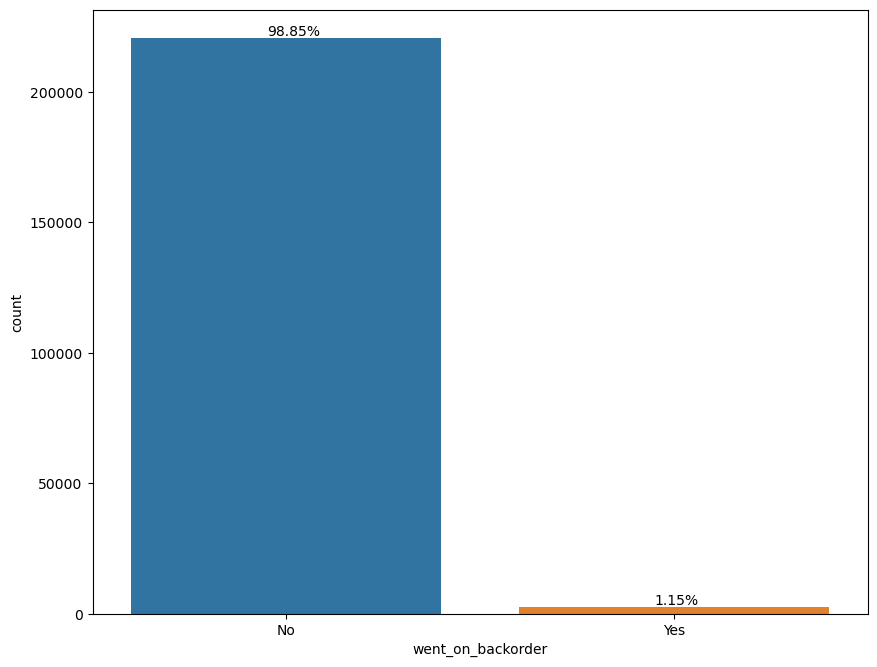

In [58]:
plt.figure(figsize=(10,8),dpi=100)

sns.countplot(data=df,x ='went_on_backorder')

plt.text(x = -0.05, y = df['went_on_backorder'].value_counts()[0] + 1000, s = str(round((df['went_on_backorder'].value_counts()[0])*100/len(df),2)) + '%')
plt.text(x = 0.95, y = df['went_on_backorder'].value_counts()[1] +1000, s = str(round((df['went_on_backorder'].value_counts()[1])*100/len(df),2)) + '%')

plt.show()


Here almost 98.85 percent of the products doesn't went on backorder.Only 1.15% of the data went to backorder.

Hence as we can see that our target variable is also higly imbalanced hence we can infer from this that we should not 
count accuracy as one of our model evaluation metric and rather go with recall or precision or ROC AUC curve. 

#  <a id='distribution'></a>
### 3.6.  Distribution of numerical variables

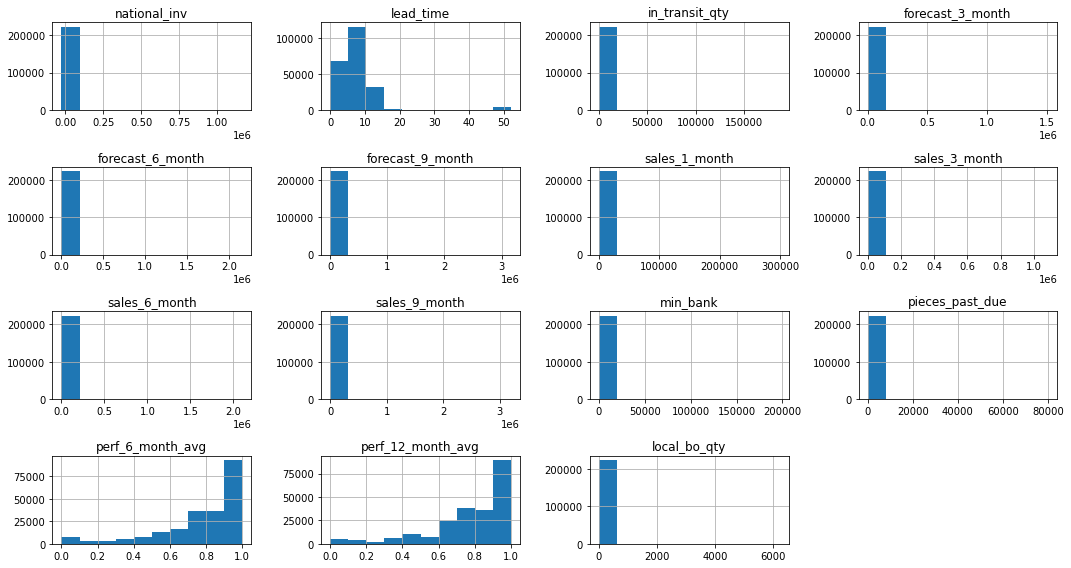

Skewness:


sku                   -0.000676
national_inv         101.786728
lead_time              4.641638
in_transit_qty       122.299742
forecast_3_month     153.047575
forecast_6_month     132.469003
forecast_9_month     132.878443
sales_1_month        136.569247
sales_3_month        141.639602
sales_6_month        141.076630
sales_9_month        142.029173
min_bank             110.376479
pieces_past_due      367.049659
perf_6_month_avg      -1.544585
perf_12_month_avg     -1.596960
local_bo_qty          92.036110
dtype: float64

In [59]:
df.drop('went_on_backorder', axis = 1).hist()

plt.tight_layout()

plt.show()  

print('Skewness:')

df.drop('went_on_backorder', axis = 1).skew()

Here almost every variable is highly skewed. So we need to check if the same prevails after treating the outliers

In [60]:
df.shape

(222974, 23)

#  <a id='detection'></a>
### 3.7.  Outlier detection Treatment

#####  Boxplots of different numerical columns 

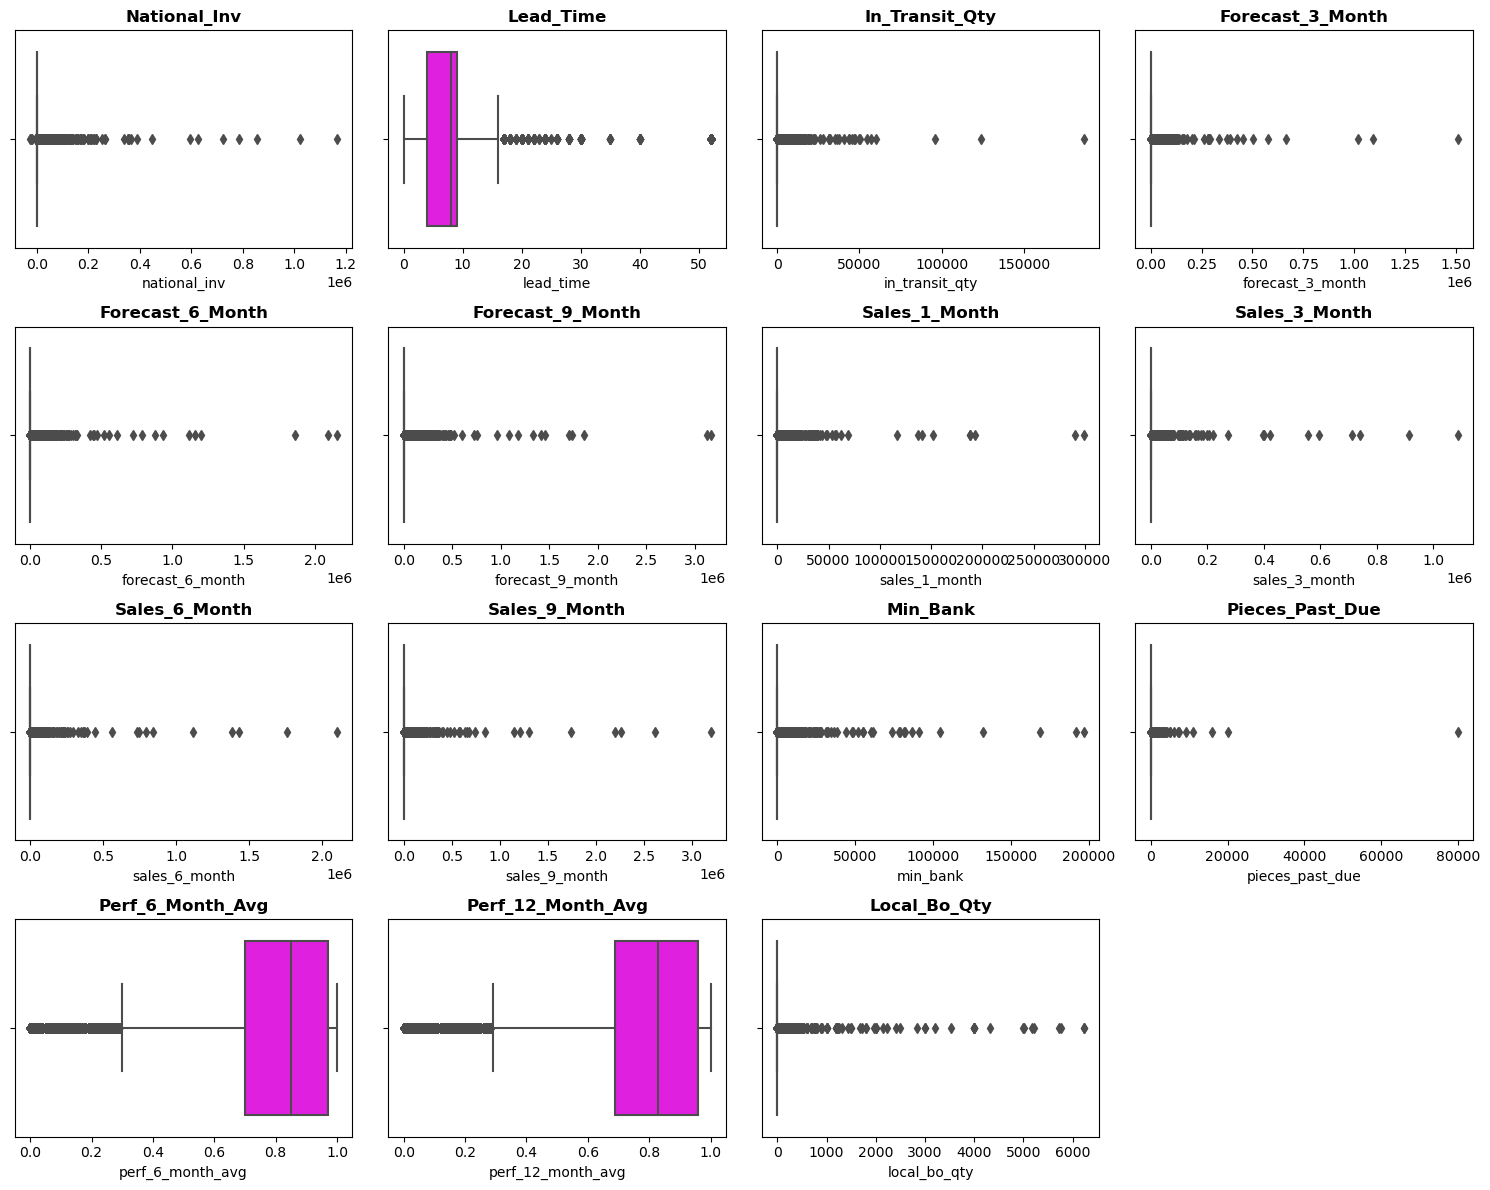

In [61]:
# Now let us check boxplots of different numerical columns 

plt.figure(figsize=(15,12),dpi=100)
n=1
for i in df.describe().columns:
  
    plt.subplot(4,4,n)
    n+=1
    sns.boxplot(df[i],color='magenta')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

<table align="left">
    <tr>
        <td width="8%">
            <img src="out.jpg">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that except for Lead_time, perf_6_months_avg and
                        perf_12_month_avg column rest all the columns have most number 
of values near to zero or zero itself.Also we can say that our columns have outliers too.<br>
Let us use the IQR method to cap the outliers</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
for i in df.select_dtypes(include='number').columns: 
    ll,Q1,Q3,ul = df[i].quantile([0.1,0.25,0.75,0.95])

    IQR=Q3-Q1
    LL=(Q1 - 5 * IQR)
    UL=(Q3 + 5 * IQR)
    df[i] = df[i].map(lambda x: ll if x<LL else ul if x>UL else x)

df.shape


(222974, 23)

Now as we can see that after removing the outlier using IQR method though instead of the standard value of 3 we are using
5 as the parameter to be multiplied with the IQR value still we are loosing almost 72489 rows. So we should check later
what effect does this removal of outliers has on our model.

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,222974.0,113.382942,235.524918,-340.0,4.00,14.00,77.00,855.0
lead_time,222974.0,7.162844,3.530669,0.0,4.00,8.00,9.00,30.0
in_transit_qty,222974.0,11.645663,23.730167,0.0,0.00,0.00,0.00,60.0
forecast_3_month,222974.0,52.180891,119.174763,0.0,0.00,0.00,6.00,336.0
forecast_6_month,222974.0,95.808027,224.179660,0.0,0.00,0.00,17.00,660.0
forecast_9_month,222974.0,145.178702,338.752019,0.0,0.00,0.00,27.00,1000.0
sales_1_month,222974.0,14.059240,33.150979,0.0,0.00,0.00,4.00,104.0
sales_3_month,222974.0,48.756429,114.762463,0.0,0.00,1.00,15.00,364.0
sales_6_month,222974.0,97.931992,229.984051,0.0,0.00,3.00,33.00,738.0
sales_9_month,222974.0,148.833353,349.049003,0.0,0.00,4.00,50.00,1119.0


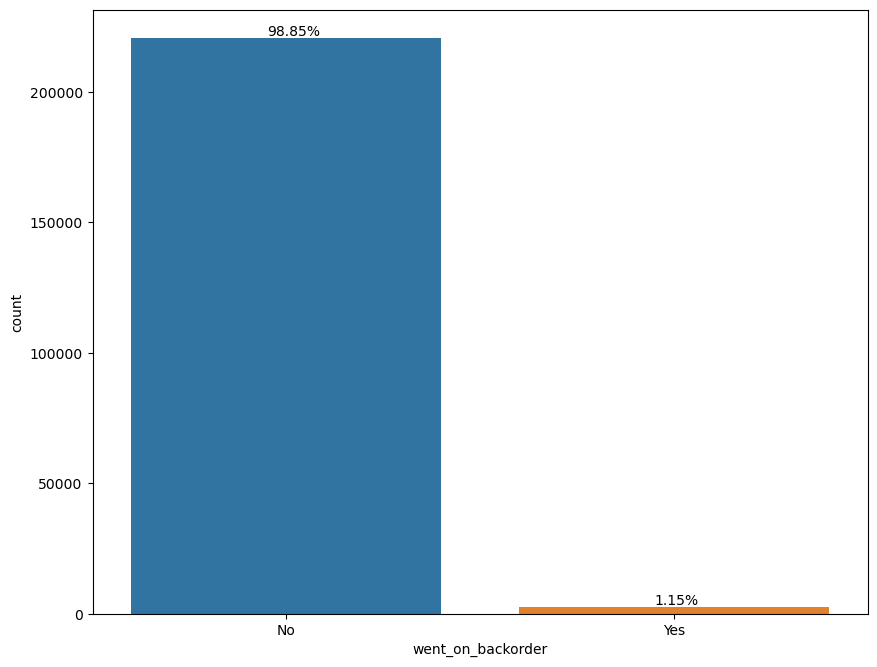

In [64]:
#Observing the target variable after outlier treatment 
plt.figure(figsize=(10,8),dpi=100)

sns.countplot(data=df,x ='went_on_backorder')
ax = plt.gca()
plt.text(x = -0.05, y = df['went_on_backorder'].value_counts()[0] + 1000, s = str(round((df['went_on_backorder'].value_counts()[0])*100/len(df),2)) + '%')
plt.text(x = 0.95, y = df['went_on_backorder'].value_counts()[1] +1000, s = str(round((df['went_on_backorder'].value_counts()[1])*100/len(df),2)) + '%')

plt.show()

In [65]:
df.drop('went_on_backorder', axis = 1).skew()

sku                 -0.000676
national_inv         2.568316
lead_time           -0.025791
in_transit_qty       1.546934
forecast_3_month     1.955414
forecast_6_month     2.104054
forecast_9_month     2.110421
sales_1_month        2.302268
sales_3_month        2.335550
sales_6_month        2.367112
sales_9_month        2.363154
min_bank             1.929169
pieces_past_due      0.000000
perf_6_month_avg    -1.544585
perf_12_month_avg   -1.596960
local_bo_qty         0.000000
dtype: float64

Though we can observe from the above output that the skewness has fairly reduced after outlier treatment 

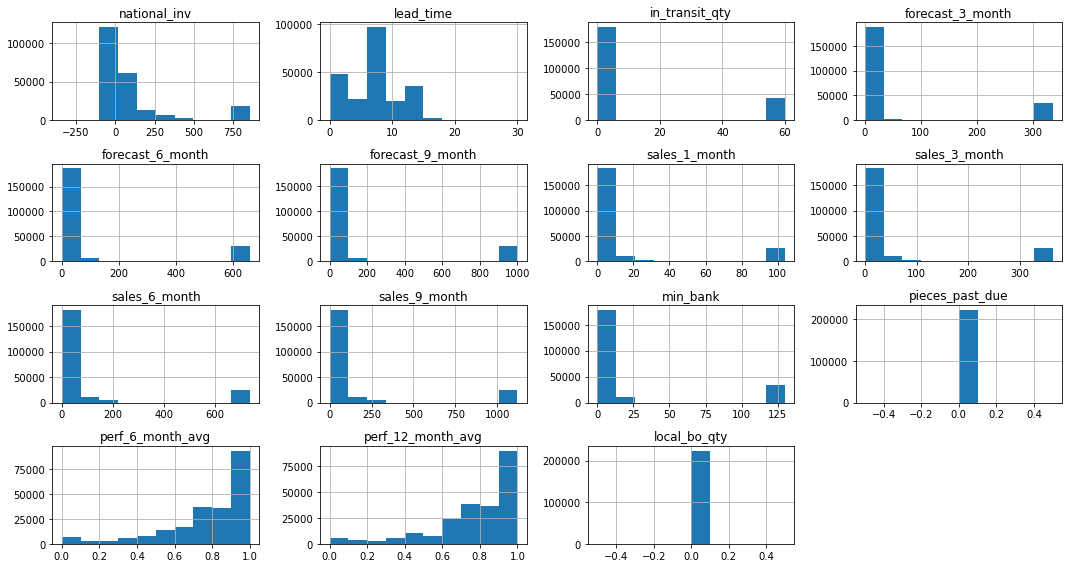

In [66]:
#Observing the distribution of the numerical variables after removal of outlier 
df.drop('went_on_backorder', axis = 1).hist()

plt.tight_layout()

plt.show()  

As we can observe from the output that the skewness has fairly reduced and is very near to zero.

#### Filtering numeric and categorical variables

In [67]:
df_num=df.select_dtypes(include='number')
df_num.head()
print(df_num.shape)

(222974, 15)


In [68]:
df_cat=df.select_dtypes(include='object')
df_cat.shape

(222974, 8)

#  <a id='univariate'></a>
### 3.8.  Univariate Analysis

#### Box plot and kdeplot for numerical and categorical variables

Skewness: 2.5683158625718687


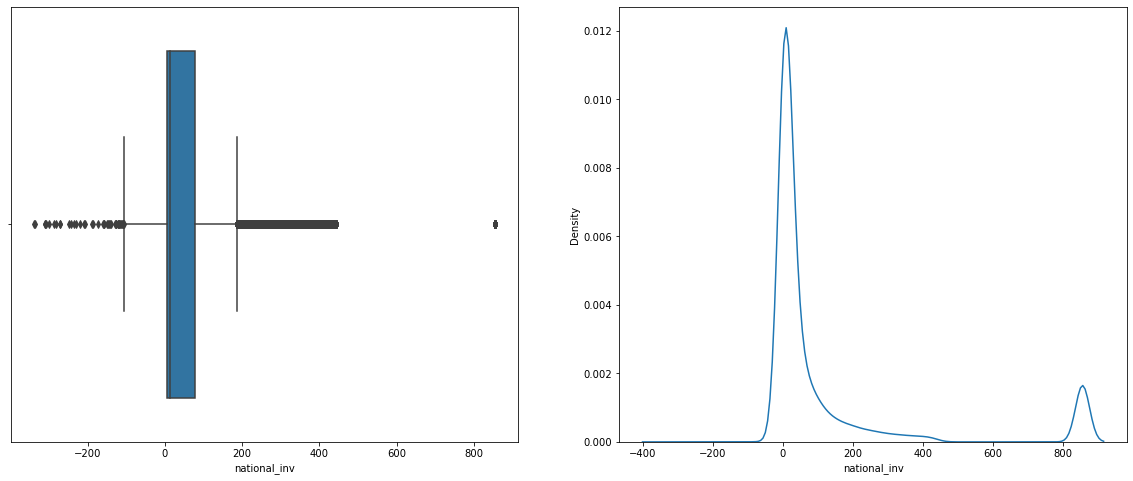

In [69]:
#Observing the boxplot and kdeplot of national_inv column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='national_inv')
plt.subplot(1,2,2)
sns.kdeplot(df['national_inv'])
print('Skewness:',df['national_inv'].skew())
plt.show()


Hence as we can see from the above graphs that the national_inv column is highly right skewed and most of the values 
are zero.

Skewness: -0.025790561850805062


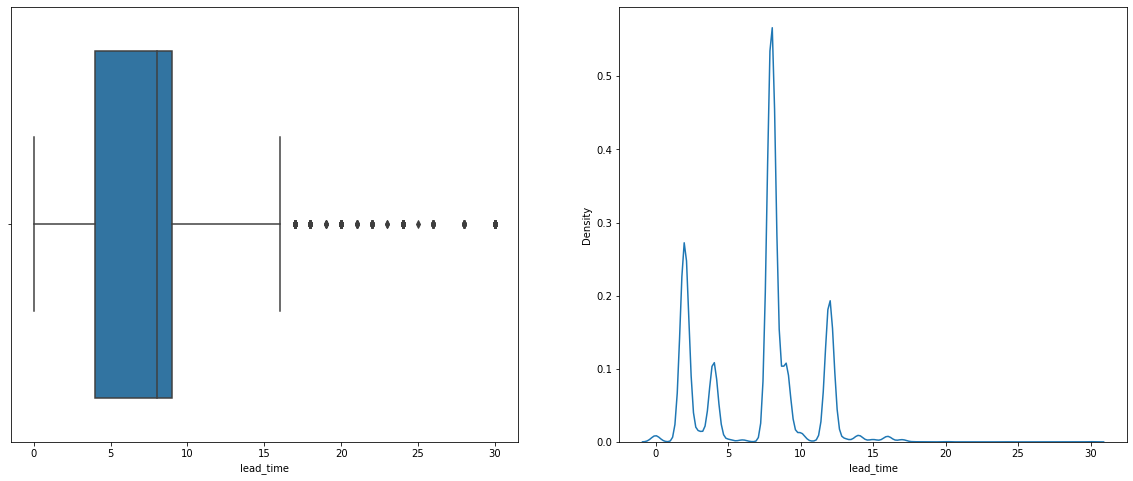

In [70]:
#Observing the boxplot and kdeplot of lead_time column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='lead_time')
plt.subplot(1,2,2)
sns.kdeplot(df['lead_time'])
print('Skewness:',df['lead_time'].skew())
plt.show()


Hence the lead_time column is also highly right skewed and it also has an outlier bump at the end.

Skewness: 1.5469340662741609


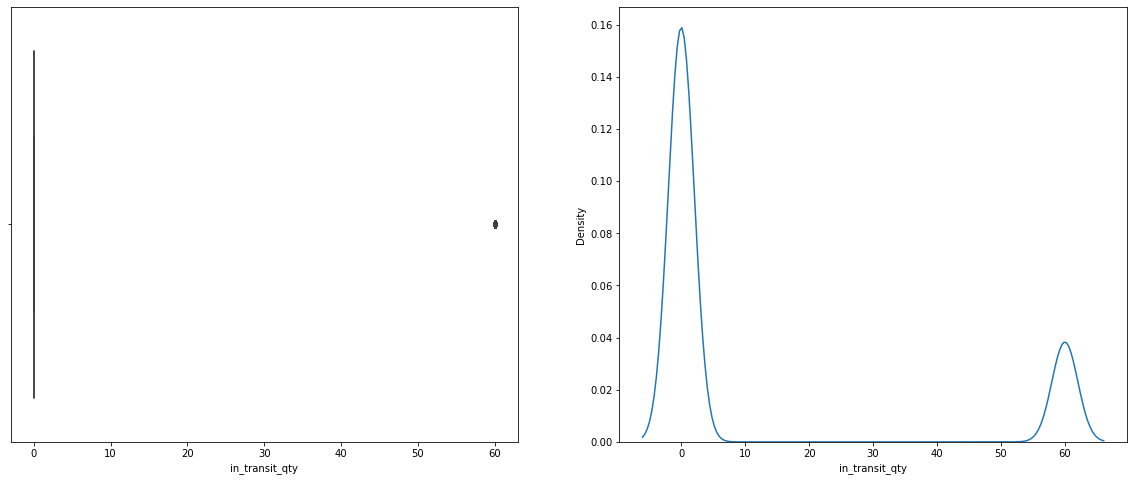

In [71]:
#Observing the boxplot and kdeplot of in_transit_qty column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='in_transit_qty')
plt.subplot(1,2,2)
sns.kdeplot(df['in_transit_qty'])
print('Skewness:',df['in_transit_qty'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

Skewness: 1.9554138305290172


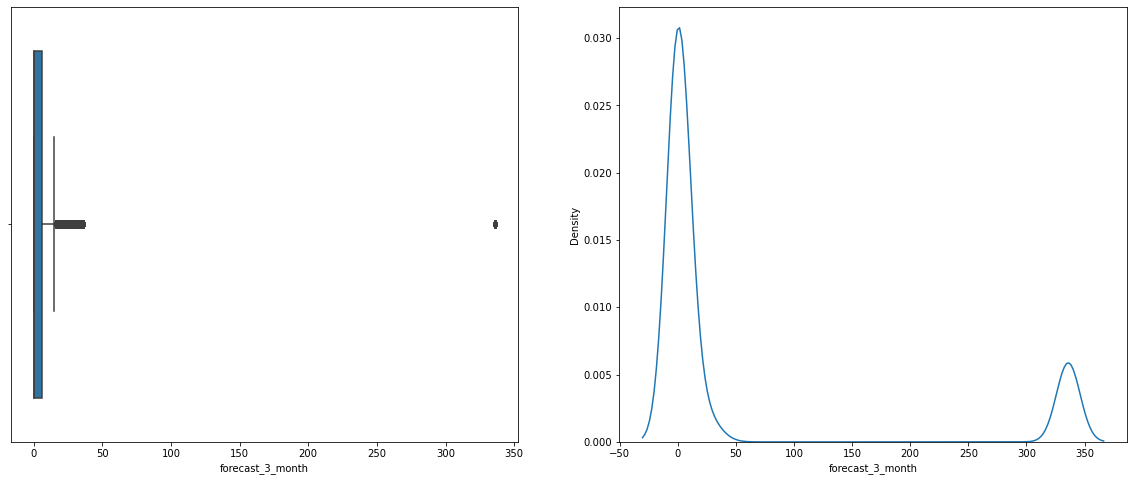

In [72]:
#Observing the boxplot and kdeplot of forecast_3_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='forecast_3_month')
plt.subplot(1,2,2)
sns.kdeplot(df['forecast_3_month'])
print('Skewness:',df['forecast_3_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

Skewness: 2.104053776791347


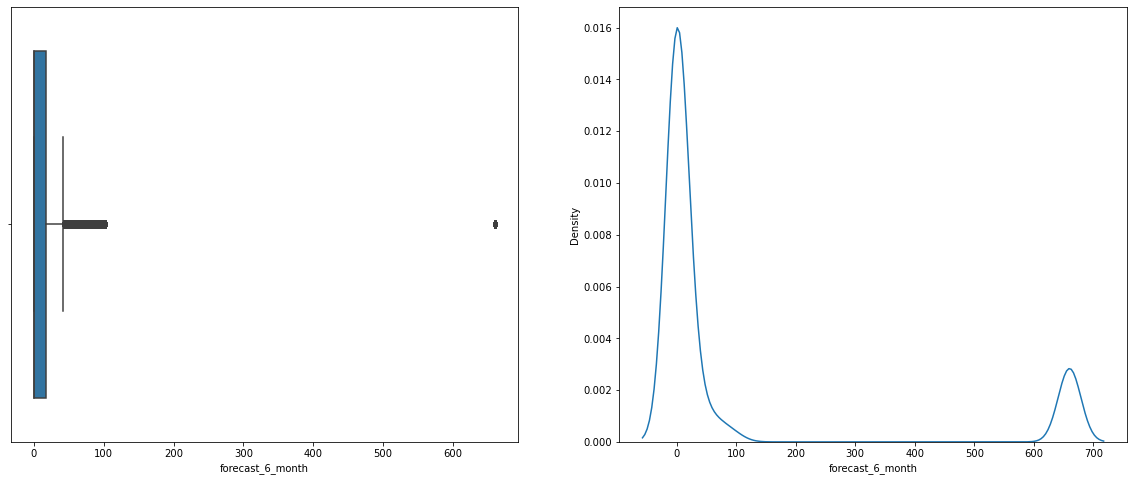

In [73]:
#Observing the boxplot and kdeplot of forecast_6_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='forecast_6_month')
plt.subplot(1,2,2)
sns.kdeplot(df['forecast_6_month'])
print('Skewness:',df['forecast_6_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

Skewness: 2.1104209143085346


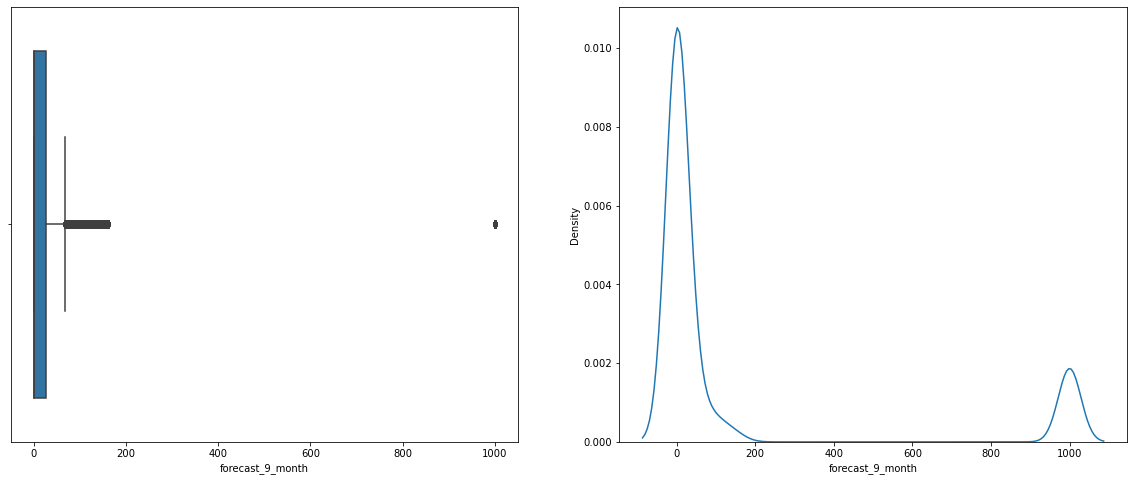

In [74]:
#Observing the boxplot and kdeplot of forecast_9_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='forecast_9_month')
plt.subplot(1,2,2)
sns.kdeplot(df['forecast_9_month'])
print('Skewness:',df['forecast_9_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

Skewness: 2.302268233421445


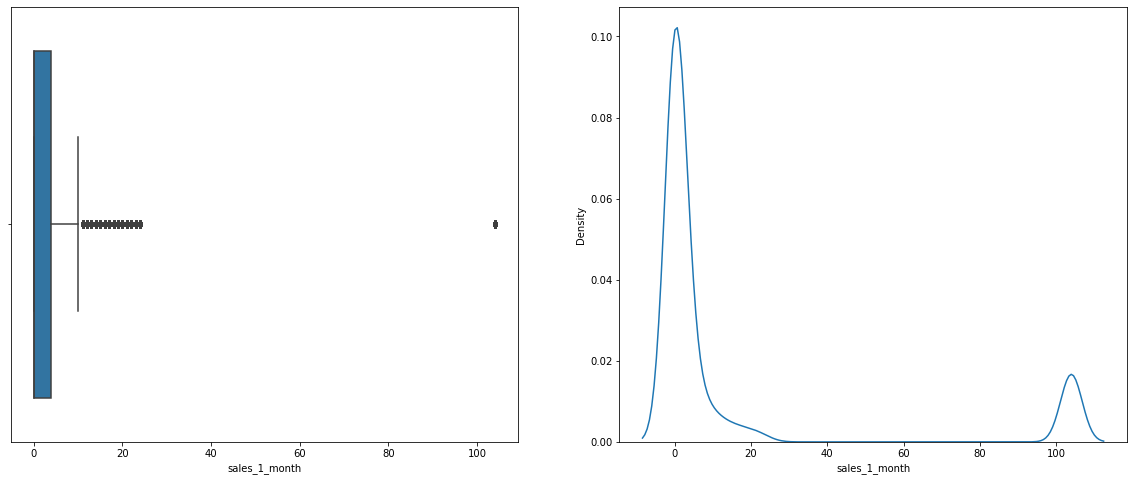

In [75]:
#Observing the boxplot and kdeplot of sales_1_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='sales_1_month')
plt.subplot(1,2,2)
sns.kdeplot(df['sales_1_month'])
print('Skewness:',df['sales_1_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

Skewness: 2.335550311968964


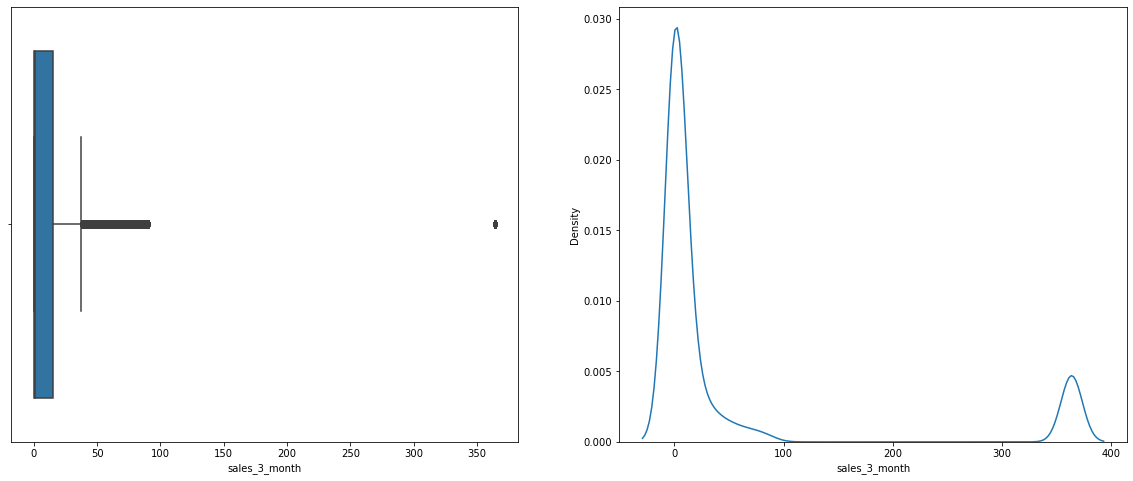

In [76]:
#Observing the boxplot and kdeplot of sales_3_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='sales_3_month')
plt.subplot(1,2,2)
sns.kdeplot(df['sales_3_month'])
print('Skewness:',df['sales_3_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

#### sales_6_month

Skewness: 2.3671115388765664


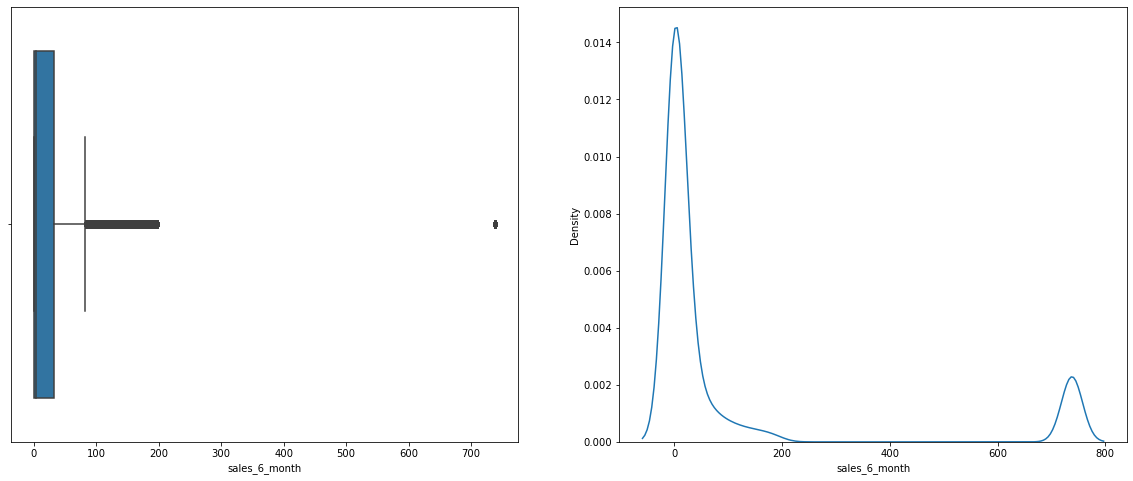

In [77]:
#Observing the boxplot and kdeplot of sales_6_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='sales_6_month')
plt.subplot(1,2,2)
sns.kdeplot(df['sales_6_month'])
print('Skewness:',df['sales_6_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

#### sales_9_month

Skewness: 2.363153662000191


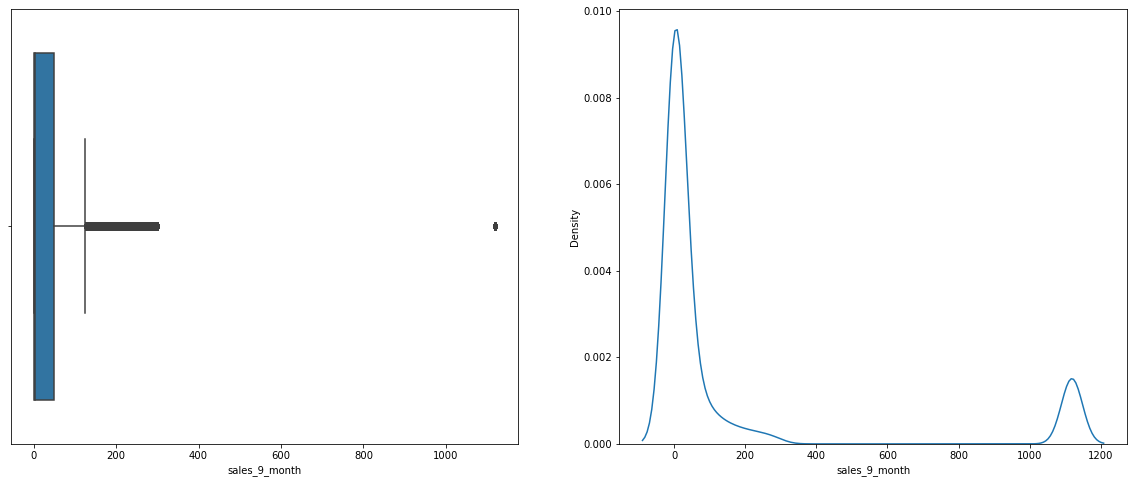

In [78]:
#Observing the boxplot and kdeplot of sales_9_month column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='sales_9_month')
plt.subplot(1,2,2)
sns.kdeplot(df['sales_9_month'])
print('Skewness:',df['sales_9_month'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

#### min_bank

Skewness: 1.9291694447123744


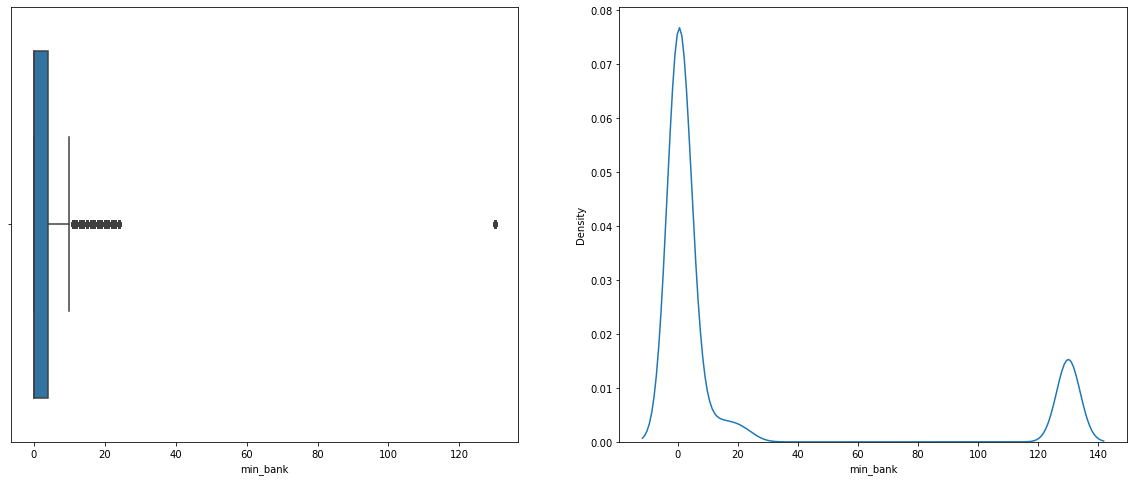

In [79]:
#Observing the boxplot and kdeplot of min_bank column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='min_bank')
plt.subplot(1,2,2)
sns.kdeplot(df['min_bank'])
print('Skewness:',df['min_bank'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

#### pieces_past_due

Skewness: 0


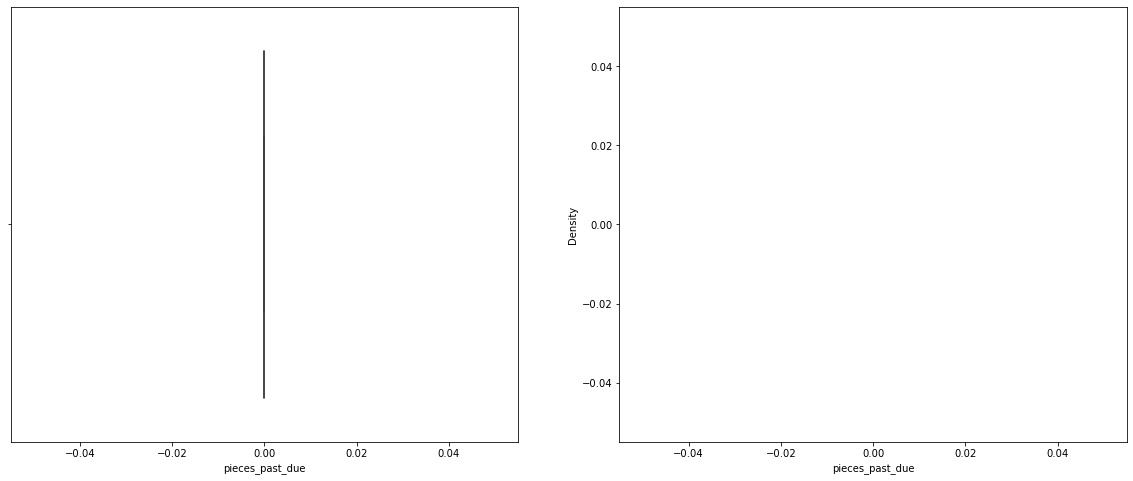

In [80]:
#Observing the boxplot and kdeplot of pieces_past_due column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='pieces_past_due')
plt.subplot(1,2,2)
sns.kdeplot(df['pieces_past_due'])
print('Skewness:',df['pieces_past_due'].skew())
plt.show()

This is also highly skewed and most of the values in it are zero.

#### perf_6_month_avg

Skewness: -1.5445853379076422


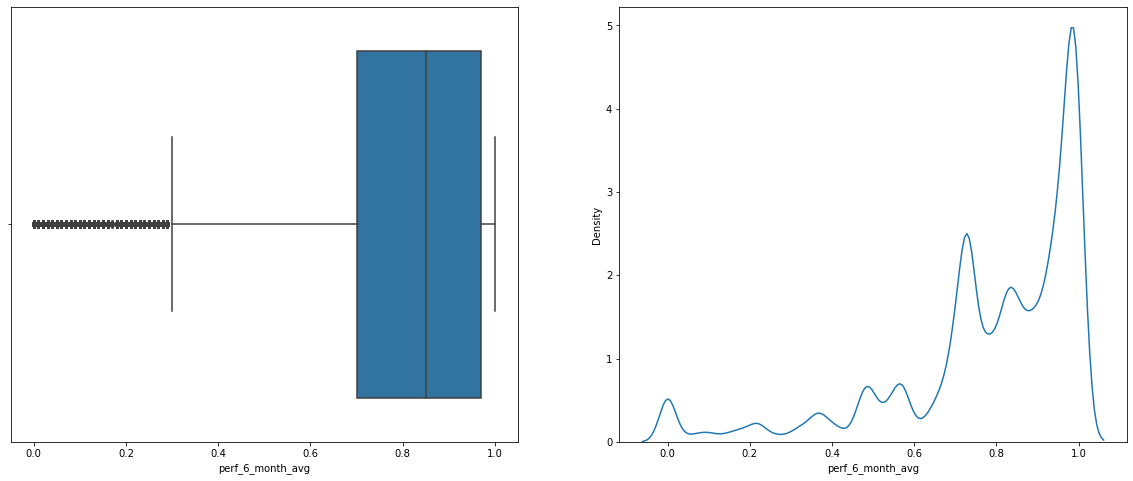

In [81]:
#Observing the boxplot and kdeplot of perf_6_month_avg column
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='perf_6_month_avg')
plt.subplot(1,2,2)
sns.kdeplot(df['perf_6_month_avg'])
print('Skewness:',df['perf_6_month_avg'].skew())
plt.show()

In [82]:
#Now lets check for the rest two columns how many values have negative values 
(df[df['perf_6_month_avg'] == -99]).shape

#Hence we know that this -99 is an outlier value so we can see that though there are 19101 -99 values still its showing as
#one point since its the same value

(0, 23)

#### perf_12_month_avg

Skewness: -1.596960099700758


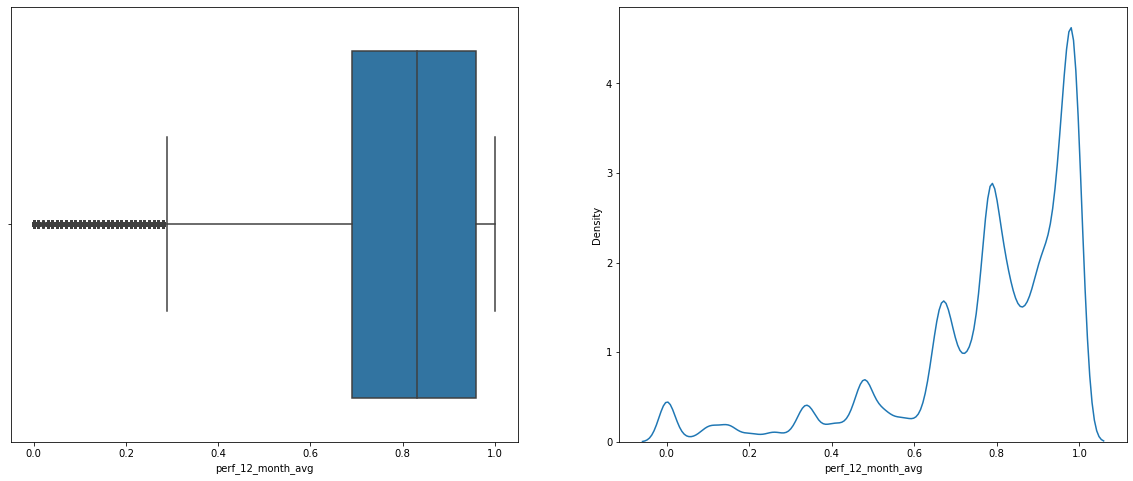

In [83]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='perf_12_month_avg')
plt.subplot(1,2,2)
sns.kdeplot(df['perf_12_month_avg'])
print('Skewness:',df['perf_12_month_avg'].skew())
plt.show()

In [84]:
#Now lets check for the rest two columns how many values have negative values 
(df[df['perf_12_month_avg'] == -99]).shape

#Hence we know that this -99 is an outlier value so we can see that though there are 17975 -99 values still its showing as
#one point since its the same value

(0, 23)

#### local_bo_qty

Skewness: 0


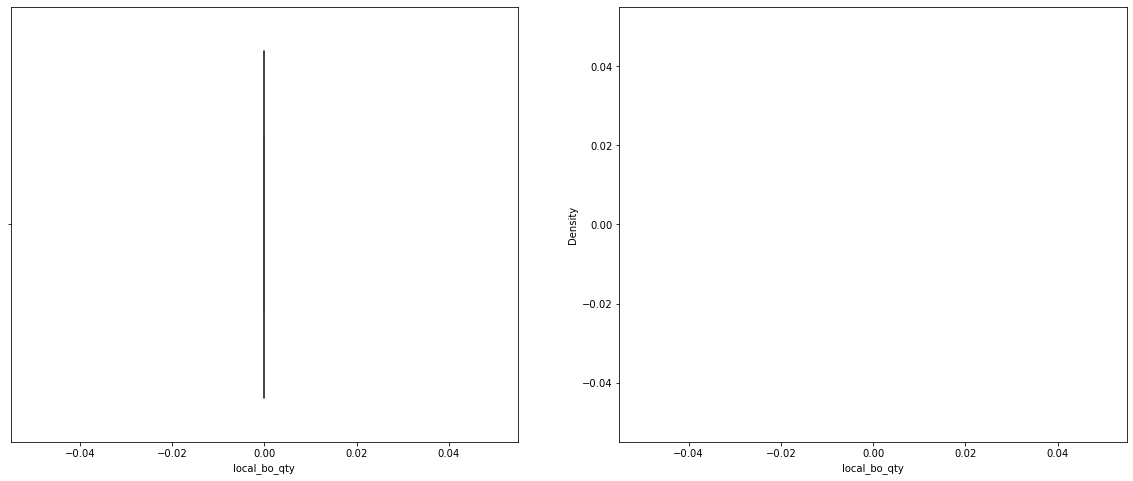

In [85]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='local_bo_qty')
plt.subplot(1,2,2)
sns.kdeplot(df['local_bo_qty'])
print('Skewness:',df['local_bo_qty'].skew())
plt.show()

Hence except for perf_12_month_avg and perf_6_month_avg rest all the columns are highly skewed and most of it has values
as zero. For the perf columns both of them have an outlier bump at the negative end of the kdeplot

#  <a id='bivariate'></a>
### 3.9.  Bivariate Analysis

#### national_inv

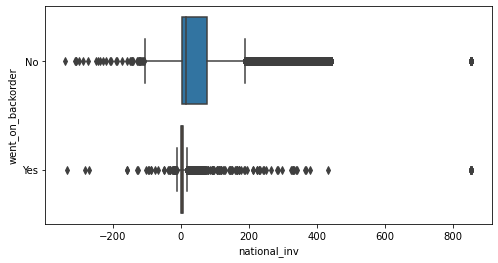

In [86]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='national_inv',y='went_on_backorder')
plt.show()

When we split the plots based on the target variable, we can see that the extent of outliers 
are more for the No category as compared to Yes. We can see that the data for the yes 
category has the highest points near 0. 
Here we can see that when the product goes to back order, the national inventory is 0,that 
is there is high chance for the product to go to back order when the national inventory is 0. 


#### Lead_time

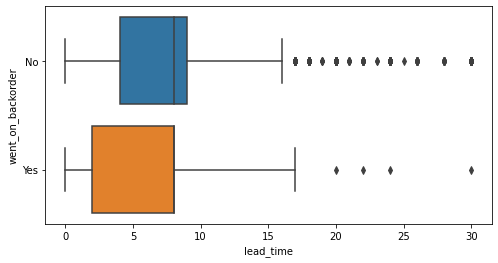

In [87]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='lead_time',y='went_on_backorder')
plt.show()

The data split based on target variable show a similar pattern. 
For both the classes, IQR is overlapping. Median values are overlapping . 
Both the data have outliers with similar values. 

#### in_transit_qty

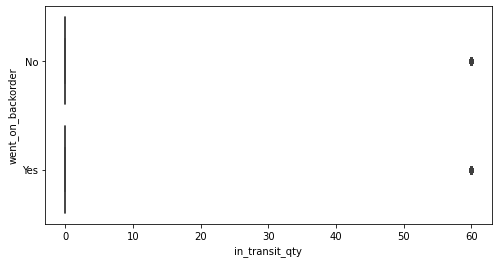

In [88]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='in_transit_qty',y='went_on_backorder')
plt.show()

The in transit quantity for went to back order is most focused at zero. This is because, the 
feature in transit quantity sincerely refers to the products which can be already available, if it is 
available then probabilities of the product going to returned order could be very less.


#### forecast_3_month

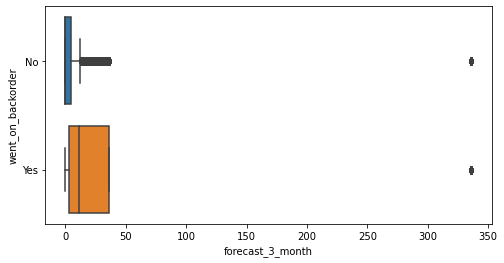

In [89]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='forecast_3_month',y='went_on_backorder')
plt.show()

When split based on the target variable, the no category has large value of outliers present as 
compared to the yes category. 

#### forecast_6_month

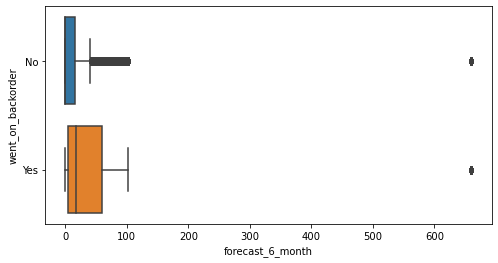

In [90]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='forecast_6_month',y='went_on_backorder')
plt.show()

 When split based on the target variable, the no category has large value of outliers present as 
compared to the yes category.

#### forecast_9_month

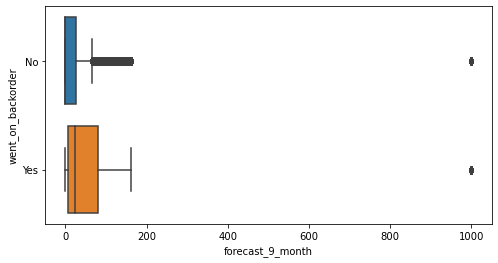

In [91]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='forecast_9_month',y='went_on_backorder')
plt.show()

When split based on the target variable, the no category has large value of outliers present as 
compared to the yes category 

#### sales_1_month

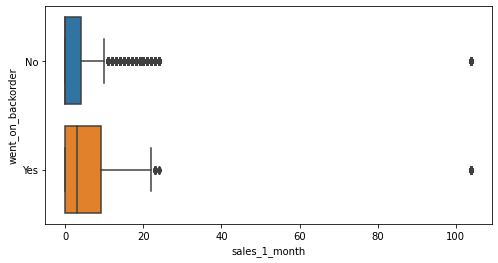

In [92]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='sales_1_month',y='went_on_backorder')
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread, 
The Yes category has more number of records at 0 value as compared to No category. 


#### sales_3_month

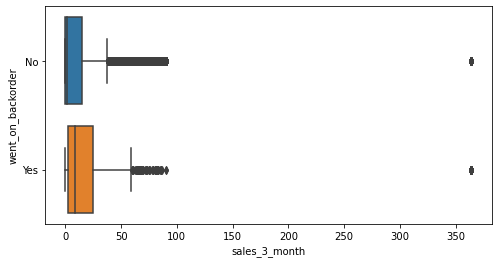

In [93]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='sales_3_month',y='went_on_backorder')
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread, 
The Yes category has more number of records at 0 value as compared to No category. 

#### sales_6_month

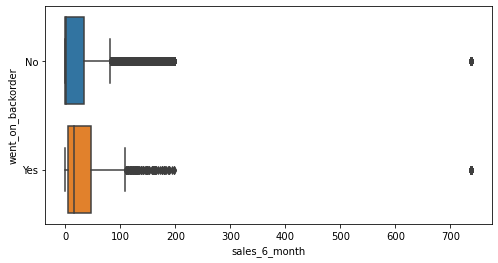

In [94]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='sales_6_month',y='went_on_backorder')
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread, 
The Yes category has more number of records at 0 value as compared to No category.

#### sales_9_month

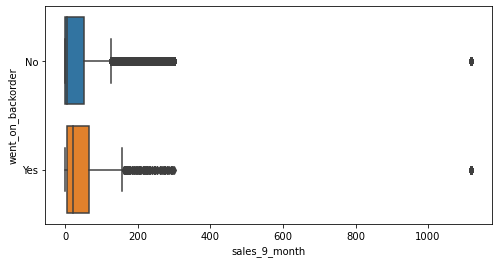

In [95]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='sales_9_month',y='went_on_backorder')
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread

#### min_bank

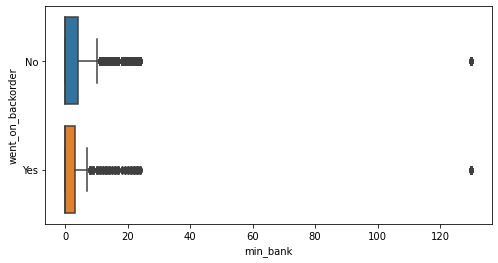

In [96]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='min_bank',y='went_on_backorder')
plt.show()

 On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread, 
The Yes category has more number of records at 0 value as compared to No category. 
We are able to see that the goods that went to back orders had maximum of the observations 
with zero as minimal recommended stock.

#### pieces_past_due

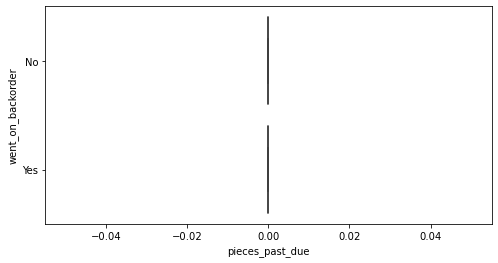

In [97]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='pieces_past_due',y='went_on_backorder')
plt.show()

 On the target variable split ,We can clearly see the large number of observation near zero for 
both the categories 
The yes category has less outlier and where as the no category outliers are widely spread, 
The Yes category has more number of records at 0 value as compared to No category. 


#### perf_6_month_avg

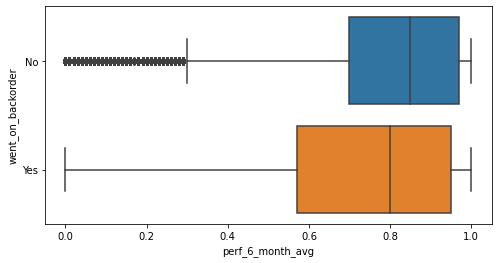

In [98]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='perf_6_month_avg',y='went_on_backorder')
plt.show()

We can see that both No and Yes category has a single outlier

#### perf_12_month_avg

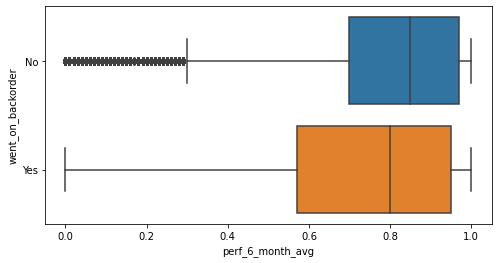

In [99]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='perf_6_month_avg',y='went_on_backorder')
plt.show()

We can see that both No and Yes category has a single outlier

#### local_bo_qty

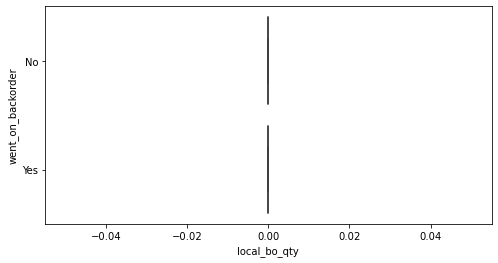

In [100]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='local_bo_qty',y='went_on_backorder')
plt.show()

There are outliers present in both the classes. The outliers for the No class of the target 
variable are more dispersed. 
We can observe that in both the categories most records are located near 0. 

Now let us check side by side that how categorical variable are distributed with respect to the target variable

#### Potential_Issues

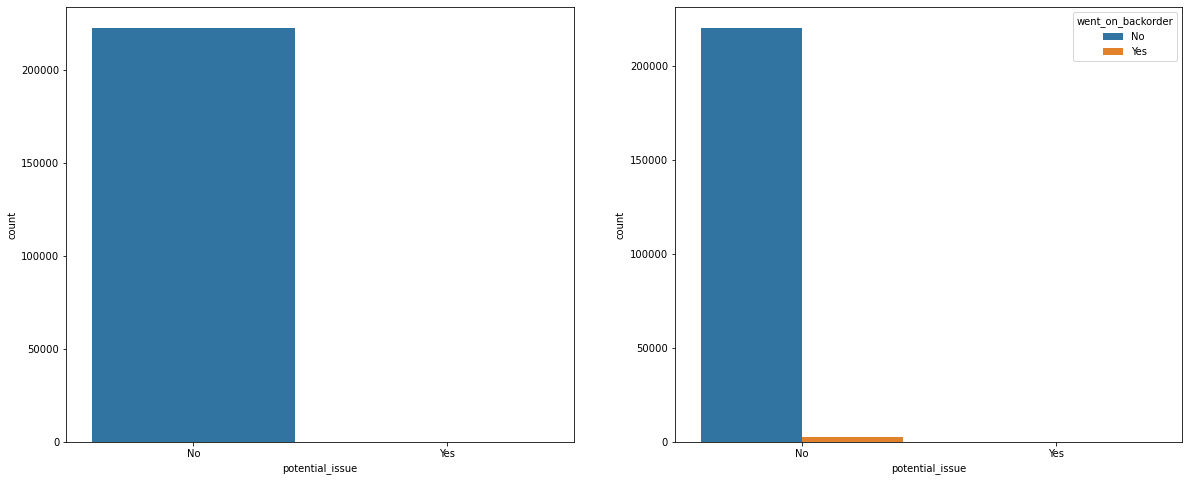

In [101]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='potential_issue')
plt.subplot(1,2,2)
sns.countplot(data=df,x='potential_issue',hue='went_on_backorder')
plt.show()

In [102]:
pd.crosstab(df['went_on_backorder'] , df['potential_issue'] , normalize = True)

potential_issue,No,Yes
went_on_backorder,,
No,0.988151,0.000350
Yes,0.011486,0.000013


Now as we can see that for 98% potential_issue as 'No' then 1% product goes into backorder and when the potential_issue 
column is 'Yes' then its almost 0%.

#### deck_risk

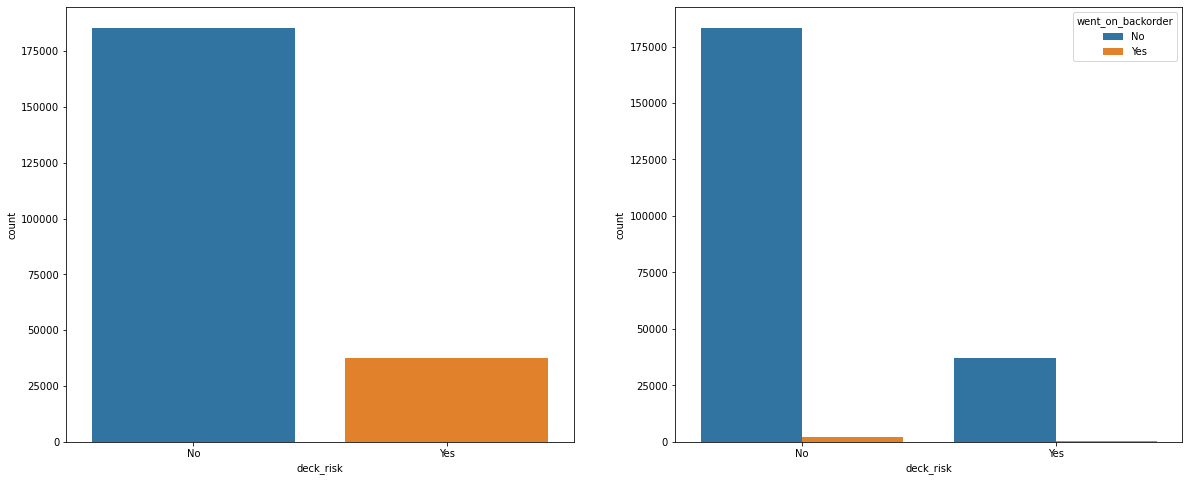

deck_risk,No,Yes
went_on_backorder,,
No,0.822168,0.166333
Yes,0.009997,0.001502


In [103]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='deck_risk')
plt.subplot(1,2,2)
sns.countplot(data=df,x='deck_risk',hue='went_on_backorder')
plt.show()
pd.crosstab(df['went_on_backorder'],df['deck_risk'],normalize = True)

Now from the above cross tab we can see that when deck_risk is changing from 'No' to 'Yes' then the percentage of products
goin in backorder is changing from 0.9% to 0.1%. So we can say that this column is somewhat effecting the target variable

#### oe_constraint

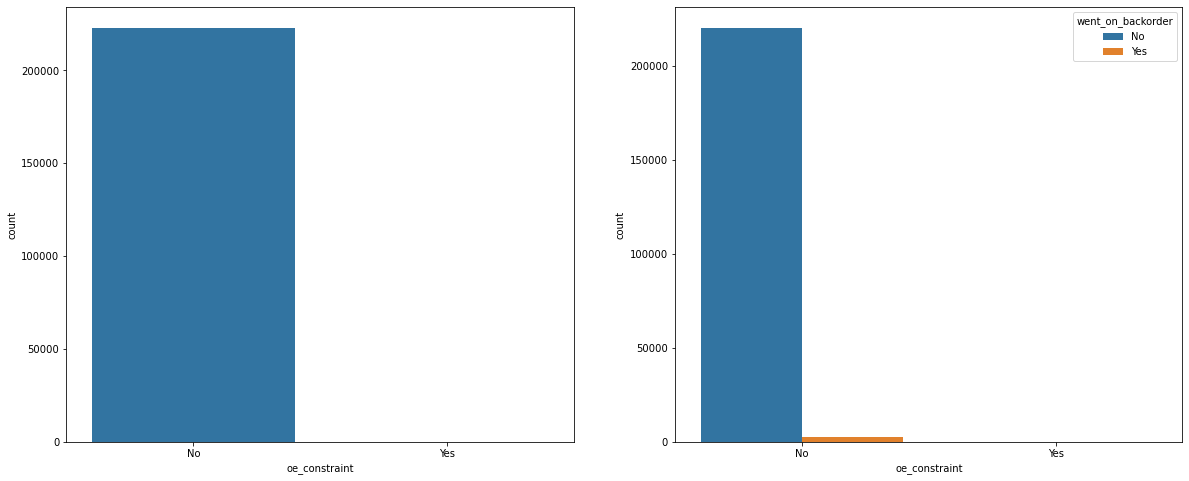

oe_constraint,No,Yes
went_on_backorder,,
No,0.988295,0.000206
Yes,0.011495,0.000004


In [104]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='oe_constraint')
plt.subplot(1,2,2)
sns.countplot(data=df,x='oe_constraint',hue='went_on_backorder')
plt.show()
pd.crosstab(df['went_on_backorder'],df['oe_constraint'],normalize=True)

Now here as we can see that when oe_constraint is 'No' then 1% product goes into backrder and for 'Yes' again its almost
zero so again we can say that this feature might be an important one

#### ppap_risk

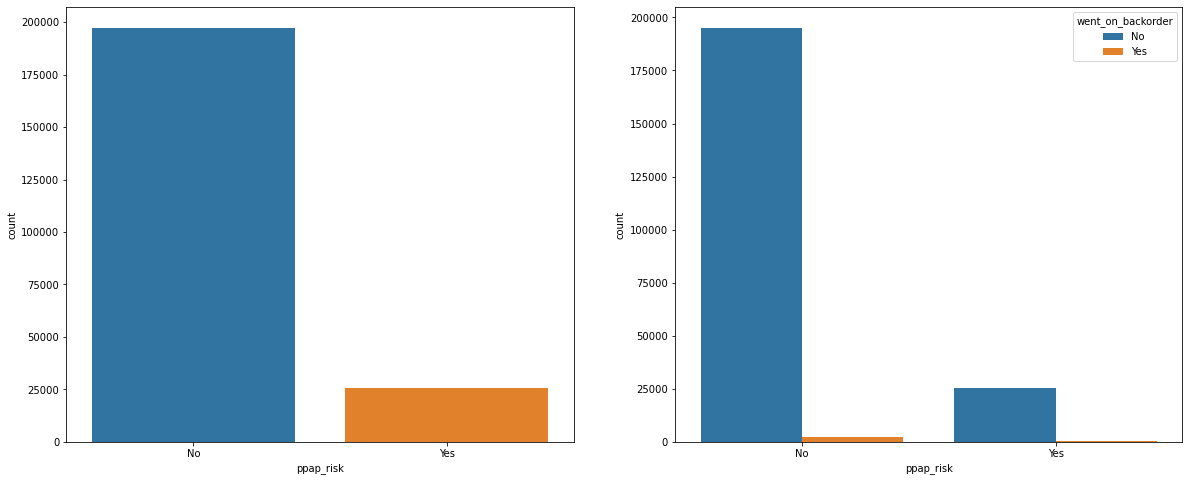

ppap_risk,No,Yes
went_on_backorder,,
No,0.875183,0.113318
Yes,0.009907,0.001592


In [105]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='ppap_risk')
plt.subplot(1,2,2)
sns.countplot(data=df,x='ppap_risk',hue='went_on_backorder')
plt.show()
pd.crosstab(df['went_on_backorder'],df['ppap_risk'],normalize=True)

Again from this one we can check that when ppap_risk is changing from 'No' to 'Yes' percentage of product going into 
backorder is reducing hence this also can be an important feature.

#### stop_auto_buy

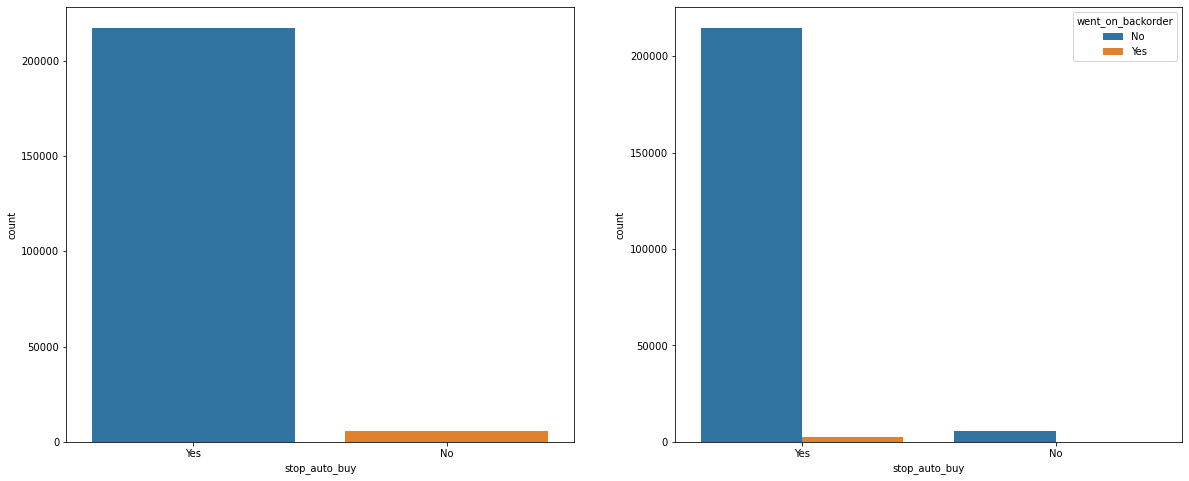

stop_auto_buy,No,Yes
went_on_backorder,,
No,0.025501,0.963000
Yes,0.000318,0.011181


In [106]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='stop_auto_buy')
plt.subplot(1,2,2)
sns.countplot(data=df,x='stop_auto_buy',hue='went_on_backorder')
plt.show()
pd.crosstab(df['went_on_backorder'],df['stop_auto_buy'],normalize=True)

Now here there is a 1% difference in the products going into backorder when stop_auto_buy is 'No' and 'Yes' respectively

#### rev_stop

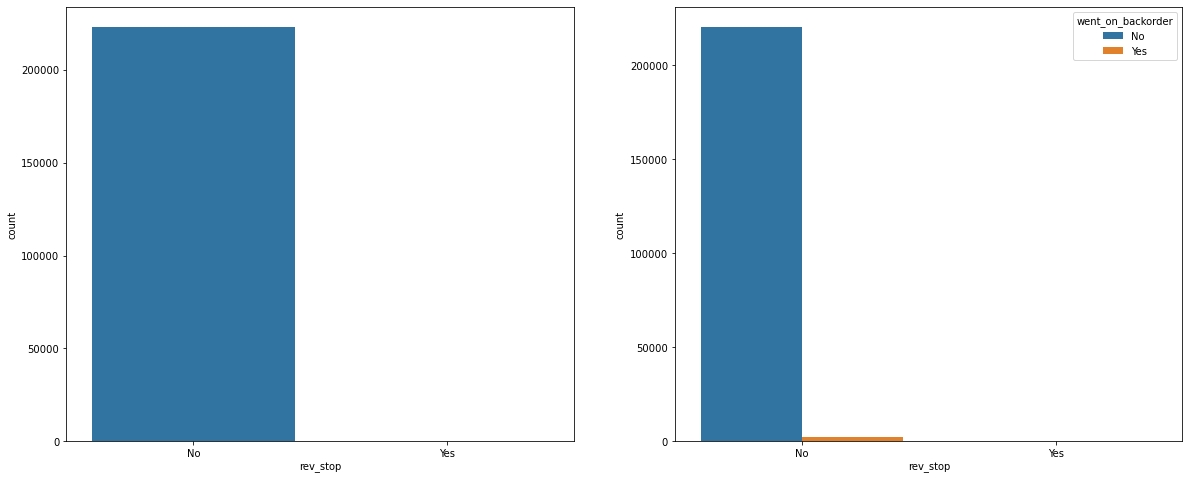

rev_stop,No,Yes
went_on_backorder,,
No,0.988281,0.000220
Yes,0.011481,0.000018


In [107]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x='rev_stop')
plt.subplot(1,2,2)
sns.countplot(data=df,x='rev_stop',hue='went_on_backorder')
plt.show()
pd.crosstab(df['went_on_backorder'],df['rev_stop'],normalize=True)

Again we can see here that when rev_stop is 'No' and 'Yes' then there is a 1% change in the product

Now lets perform statistical analysis for different numerical and categorical variables with respect to the target
variable.

# <a id='testing'></a>
## 4. Statistical tests

#### Lets first check the dependency of categorical variables on the target variable 

In [110]:
for i in df_cat.columns:
    table=pd.crosstab(df['went_on_backorder'],df[i])
    stats,p,dof,exp=chi2_contingency(table)
    alpha=0.05
    print('p-value is '+str(p))
    if p<=alpha:
        print('The went_on_backorder and ',i,'are dependent. Reject Null hypothesis')
        print()
    else:
        print('The went_on_backorder and ',i,' are independent. Accept null hypothesis')
        print()

p-value is 0.4990043268147035
The went_on_backorder and  sku  are independent. Accept null hypothesis

p-value is 0.10204672864382167
The went_on_backorder and  potential_issue  are independent. Accept null hypothesis

p-value is 4.648421762649526e-07
The went_on_backorder and  deck_risk are dependent. Reject Null hypothesis

p-value is 1.0
The went_on_backorder and  oe_constraint  are independent. Accept null hypothesis

p-value is 0.00019226094400697413
The went_on_backorder and  ppap_risk are dependent. Reject Null hypothesis

p-value is 0.590220727336177
The went_on_backorder and  stop_auto_buy  are independent. Accept null hypothesis

p-value is 0.00019566661284411125
The went_on_backorder and  rev_stop are dependent. Reject Null hypothesis

p-value is 0.0
The went_on_backorder and  went_on_backorder are dependent. Reject Null hypothesis



Now hence from the above statistical test we can say that the columns deck_risk, ppap_risk, rev_stop has a statistical
significance with respect to the target variable. We'll compare the above results later.

In [111]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,222974.0,113.382942,235.524918,-340.0,4.00,14.00,77.00,855.0
lead_time,222974.0,7.162844,3.530669,0.0,4.00,8.00,9.00,30.0
in_transit_qty,222974.0,11.645663,23.730167,0.0,0.00,0.00,0.00,60.0
forecast_3_month,222974.0,52.180891,119.174763,0.0,0.00,0.00,6.00,336.0
forecast_6_month,222974.0,95.808027,224.179660,0.0,0.00,0.00,17.00,660.0
forecast_9_month,222974.0,145.178702,338.752019,0.0,0.00,0.00,27.00,1000.0
sales_1_month,222974.0,14.059240,33.150979,0.0,0.00,0.00,4.00,104.0
sales_3_month,222974.0,48.756429,114.762463,0.0,0.00,1.00,15.00,364.0
sales_6_month,222974.0,97.931992,229.984051,0.0,0.00,3.00,33.00,738.0
sales_9_month,222974.0,148.833353,349.049003,0.0,0.00,4.00,50.00,1119.0


Now from the above summary we can see that the maximum and minimum value is varying so much so hence we'll need to 
transform them but as we can see that it has zero and negative values so we cannot go for basic log,sqrt,boxcox or 
reciprocal transformations so we'll go for PowerTransformer instead from the sklearn library.

In [112]:
#Using PowerTransformer for our numerical columns
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_num.columns:
    df_num[i]=PT.fit_transform(df_num[[i]])

In [113]:
#Observing the statistical summary after applying the PowerTransformer()
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,222974.0,7.025155e-16,1.000002,-61.522765,-0.509544,-0.384169,0.075328,2.591746
lead_time,222974.0,-1.631764e-15,1.000002,-2.148518,-0.880743,0.259918,0.534883,5.857656
in_transit_qty,222974.0,2.481900e-14,1.000002,-0.490755,-0.490755,-0.490755,-0.490755,2.037678
forecast_3_month,222974.0,-9.554200e-14,1.000002,-0.659993,-0.659993,-0.659993,1.122632,1.767841
forecast_6_month,222974.0,-5.688003e-14,1.000002,-0.744114,-0.744114,-0.744114,1.140937,1.668088
forecast_9_month,222974.0,-1.079374e-14,1.000002,-0.787688,-0.787688,-0.787688,1.106176,1.631449
sales_1_month,222974.0,2.604318e-14,1.000002,-0.804383,-0.804383,-0.804383,0.954168,1.728751
sales_3_month,222974.0,1.616898e-14,1.000002,-0.964548,-0.964548,-0.291063,0.937534,1.655856
sales_6_month,222974.0,2.103955e-15,1.000002,-1.061262,-1.061262,-0.062025,0.916116,1.635150
sales_9_month,222974.0,-1.340949e-14,1.000002,-1.113230,-1.113230,-0.083121,0.895618,1.628516


In [114]:
#Now let us fit a model with only the categorical variablesand check for the significant columns

In [115]:
df3 = df_cat.drop(labels = ['sku' , 'went_on_backorder'] , axis = 1)
df3.head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,No,No,No,No,Yes,No
1,No,No,No,Yes,Yes,No
2,No,No,No,No,Yes,No
3,No,No,No,No,Yes,No
4,No,No,No,No,Yes,No


In [116]:
df_enc = pd.get_dummies(data = df3 , drop_first = True)

df_enc.head()

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,0,0,0,0,1,0
1,0,0,0,1,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [117]:
y1 = df['went_on_backorder'].apply(lambda x :0 if x == 'No' else 1)
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: went_on_backorder, dtype: int64

In [118]:
pval_var=[]
for i in df_num.columns:
    class_1=df1[df1['went_on_backorder']=='Yes'][i]
    class_2=df1[df1['went_on_backorder']=='No'][i]
    
    stat_1,pvalue_1=jarque_bera(class_1)
    stat_2,pvalue_2=jarque_bera(class_2)
    
    if pvalue_1 < 0.05 or pvalue_2 < 0.05:
        print("feature %s is not normally distributed " %i)
        
        print("performing mannwhitneyu test")
        print(mannwhitneyu(class_1,class_2))
        stat,pvalue= mannwhitneyu(class_1,class_2)
        if pvalue < 0.05:
            pval_var.append(pvalue)
            print('feature %s has impact on went_on_backorder' %i)
            print(" ")
        else:
            pval_var.append(pvalue)
            print('feature %s has no impact on went_on_backorder' %i)
            print(" ")
    else:
        
        print("feature %s is normally distributed " %i)        
        print("performing ttest_ind test")
        print(ttest_ind(class_1,class_2))
        stat,pvalue= ttest_ind(class_1,class_2)
        if pvalue < 0.05:
            pval_var.append(pvalue)
            print('feature %s has impact on went_on_backorder' %i)
            print(" ")
        else:
            pval_var.append(pvalue)
            print('feature %s has no impact on went_on_backorder' %i)
            print(" ")

feature national_inv is not normally distributed 
performing mannwhitneyu test
MannwhitneyuResult(statistic=140248880.5, pvalue=0.0)
feature national_inv has impact on went_on_backorder
 
feature lead_time is normally distributed 
performing ttest_ind test
Ttest_indResult(statistic=nan, pvalue=nan)
feature lead_time has no impact on went_on_backorder
 
feature in_transit_qty is not normally distributed 
performing mannwhitneyu test
MannwhitneyuResult(statistic=298488557.5, pvalue=1.6224880999373716e-21)
feature in_transit_qty has impact on went_on_backorder
 
feature forecast_3_month is not normally distributed 
performing mannwhitneyu test
MannwhitneyuResult(statistic=479907430.0, pvalue=0.0)
feature forecast_3_month has impact on went_on_backorder
 
feature forecast_6_month is not normally distributed 
performing mannwhitneyu test
MannwhitneyuResult(statistic=474373792.5, pvalue=0.0)
feature forecast_6_month has impact on went_on_backorder
 
feature forecast_9_month is not normally d

In [119]:
sig=pd.DataFrame(data=pval_var,index=df_num.columns,columns=['P_Val'])
sig[sig['P_Val']<0.05]

,P_Val
national_inv,0.000000e+00
in_transit_qty,1.622488e-21
forecast_3_month,0.000000e+00
forecast_6_month,0.000000e+00
forecast_9_month,0.000000e+00
sales_1_month,2.336176e-181
sales_3_month,1.624569e-183
sales_6_month,2.809987e-149
sales_9_month,2.170709e-132
pieces_past_due,5.248545e-105


# <a id='model_building'></a>
## 5. Base Model building 

In [128]:
def model_eval(model,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full):
    
    model.fit(xtrain,ytrain)
    
    yprob_train = model.predict_proba(xtrain)[:,1]
    yprob_test = model.predict_proba(xtest)[:,1]
    
    ypred_train = list(map(lambda x :0 if x<0.5 else 1,yprob_train))
    ypred_test  = list(map(lambda x :0 if x<0.5 else 1,yprob_test))
    
    # for cross validation purpose, default accuracy score with default predictions
    acc_train_without= accuracy_score(ytrain,model.predict(xtrain))
    acc_test_without = accuracy_score(ytest,model.predict(xtest))
    print("Default accuracy score of the train data is: ",acc_train_without)
    print("Default accuracy score of the test data is: ",acc_test_without)
    
    # accuracy score with manually calculated threshold.
    ac_tr = accuracy_score(ytrain,ypred_train)
    ac_ts = accuracy_score(ytest, ypred_test)
    print("\nThreshhold defined accuracy score of the train data is: ",ac_tr)
    print("Threshhold defined accuracy score of the test data is: ",ac_ts)

    f1_tr = f1_score(ytrain,ypred_train,zero_division=0)
    f1_ts = f1_score(ytest ,ypred_test, zero_division=0)
    print("\nF1 score of the train data is: ",f1_tr)
    print("F1 score of the test data is: ",   f1_ts)

    roc_tr = roc_auc_score(ytrain,yprob_train)
    roc_ts = roc_auc_score(ytest, yprob_test)
    print("\nroc_auc_score of the train data is: ",roc_tr)
    print("roc_auc_score of the test data is: ",   roc_ts)

    print('\nClassification report train')
    print(classification_report(ytrain,ypred_train))

    print('\n\nClassification report test')
    print(classification_report(ytest,ypred_test))

    print('\nConfusion matrix train data')
    plt.figure(figsize=(5,3))
    cm2=confusion_matrix(ytrain,ypred_train)
    conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    
    print('\nConfusion matrix test data')
    plt.figure(figsize=(5,3))
    cm2=confusion_matrix(ytest,ypred_test)
    conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show() 
    
    cm = confusion_matrix(ytest,ypred_test)
    recall = cm[1,1]/(cm[1,1]+cm[1,0])
    print('\nRecall(TPR) for test data =',recall)
    
    fpr,tpr,thresholds = roc_curve(ytest, yprob_test)
    fpr1,tpr1,th1      = roc_curve(ytrain,yprob_train)
    
    plt.figure(figsize=(10,7))
    plt.plot(fpr,fpr)
    plt.plot(fpr1,tpr1,label='Train roc_curve')
    plt.plot(fpr,tpr,label='Test roc_curve')
    plt.xlabel('FPR',fontsize=14)
    plt.ylabel('TPR',fontsize=14)
    plt.text(x = 0.62, y = 0.3, s = ('AUC Score for test:',round(roc_ts,4)))
    plt.text(x = 0.62, y = 0.2, s = ('AUC Score for train:',round(roc_tr,4)))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()
    
    return f1_tr,f1_ts,roc_tr,roc_ts , acc_train_without,acc_test_without, recall

In [129]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Train ROC','Test ROC','Train f1_Score','Test_f1_Score','Test_Recall','Cohen-Kappa-Score'])

def update_score_card(algorithm_name, model,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full):
    model.fit(xtrain,ytrain)
    
    yprob_train = model.predict_proba(xtrain)[:,1]
    yprob_test = model.predict_proba(xtest)[:,1]

    ypred_train = list(map(lambda x :0 if x<0.5 else 1,yprob_train))
    ypred_test  = list(map(lambda x :0 if x<0.5 else 1,yprob_test))
    
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Train f1_Score' : f1_score(ytrain,ypred_train,zero_division=0),
                                    'Test_f1_Score':f1_score(ytest ,ypred_test, zero_division=0),
                                    'Train ROC':roc_auc_score(ytrain,yprob_train),
                                    'Test ROC':roc_auc_score(ytest, yprob_test),
                                    'Test_Recall':recall_score(ytest,ypred_test),
                                    'Cohen-Kappa-Score':cohen_kappa_score(ytest, ypred_test) 

                                   }, ignore_index = True)

In [130]:
X = pd.concat([df_num.drop('lead_time',axis = 1) , df_enc[['deck_risk_Yes' , 'ppap_risk_Yes','rev_stop_Yes']]],axis = 1)

X.reset_index(drop=True,inplace=True)
X.head()

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk_Yes,ppap_risk_Yes,rev_stop_Yes
0,-0.353582,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,0.591350,0.903684,0.0,0,0,0
1,-0.440785,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-0.372301,-0.851553,0.0,-0.313378,-0.468057,0.0,0,1,0
2,-0.544057,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-1.280194,-0.667787,0.0,0,0,0
3,-0.373742,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-0.516285,-0.372301,-0.851553,0.0,-1.659363,-0.804072,0.0,0,0,0
4,0.688939,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-0.873798,-0.969123,0.0,0,0,0


In [131]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: went_on_backorder, dtype: int64

In [44]:
#Now let us consider the statistical significant columns to build a logistic regression model

In [136]:
x_train_stat , x_test_stat , y_train_stat , y_test_stat = train_test_split(X, y1, random_state = 10, test_size = 0.2)
print('X_train', x_train_stat.shape)
print('y_train', y_train_stat.shape)

# print dimension of test set
print('X_test', x_test_stat.shape)
print('y_test', y_test_stat.shape)

X_train (178379, 17)
y_train (178379,)
X_test (44595, 17)
y_test (44595,)


In [137]:
from sklearn.linear_model import LogisticRegression
Logreg=LogisticRegression()
base_model_stat = Logreg.fit(x_train_stat,y_train_stat)
y_pred_stat=base_model_stat.predict(x_test_stat)
print(classification_report(y_test_stat,y_pred_stat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44064
           1       0.10      0.00      0.00       531

    accuracy                           0.99     44595
   macro avg       0.54      0.50      0.50     44595
weighted avg       0.98      0.99      0.98     44595



Default accuracy score of the train data is:  0.9885412520532125
Default accuracy score of the test data is:  0.9879134432111223

Threshhold defined accuracy score of the train data is:  0.9885412520532125
Threshhold defined accuracy score of the test data is:  0.9879134432111223

F1 score of the train data is:  0.0058365758754863805
F1 score of the test data is:  0.003696857670979667

roc_auc_score of the train data is:  0.8554466625104811
roc_auc_score of the test data is:  0.8590546518879576

Classification report train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    176346
           1       0.26      0.00      0.01      2033

    accuracy                           0.99    178379
   macro avg       0.62      0.50      0.50    178379
weighted avg       0.98      0.99      0.98    178379



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44064
      

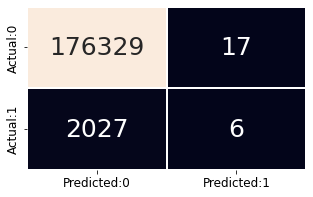


Confusion matrix test data


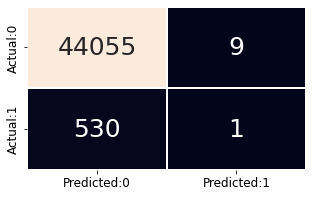


Recall(TPR) for test data = 0.0018832391713747645


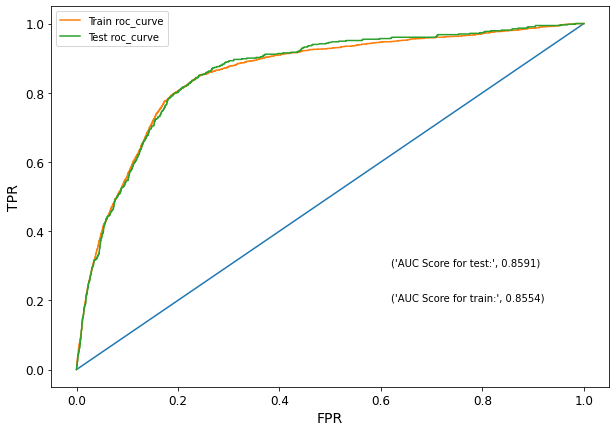

(0.0058365758754863805,
 0.003696857670979667,
 0.8554466625104811,
 0.8590546518879576,
 0.9885412520532125,
 0.9879134432111223,
 0.0018832391713747645)

In [138]:
model_eval(base_model_stat,xtrain=x_train_stat, xtest=x_test_stat, ytrain=y_train_stat, ytest=y_test_stat)

In [139]:
x_train_stat

,national_inv,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk_Yes,ppap_risk_Yes,rev_stop_Yes
178025,-0.564532,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.291063,-0.516285,-0.625583,-0.851553,0.0,-0.568126,-0.246096,0.0,1,0,0
142427,0.153396,2.037678,1.586530,1.485926,1.418352,1.351594,1.327509,1.318659,1.278933,1.712961,0.0,1.258133,1.173371,0.0,0,0,0
191317,-0.525997,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,0.096656,0.0,1.168049,1.267557,0.0,0,0,0
167685,-0.509544,-0.490755,0.951164,0.890871,0.860462,-0.804383,0.368712,0.067472,0.344193,1.044737,0.0,-0.258464,-0.888893,0.0,0,0,0
131353,-0.384169,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.291063,-0.516285,-0.625583,-0.851553,0.0,-1.526682,-1.468085,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105595,-0.525997,-0.490755,1.430107,1.123275,0.954950,-0.804383,-0.964548,-1.061262,-0.625583,-0.851553,0.0,-0.873798,-0.468057,0.0,1,1,0
93553,-0.373742,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,0.028970,0.067472,0.012628,0.487765,0.0,-1.221591,-0.804072,0.0,0,0,0
181568,-0.271497,-0.490755,-0.659993,-0.744114,-0.787688,0.809076,0.228269,-0.062025,-0.205541,-0.851553,0.0,-0.024715,-0.759877,0.0,0,0,0
94735,-0.466282,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-0.083121,-0.851553,0.0,0.371254,0.494804,0.0,0,0,0


In [135]:
### Lets do Logistic Regression with all features

In [123]:
X1 = pd.concat([df_num,df_enc],axis = 1)
X1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,-0.353582,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,0.591350,0.903684,0.0,0,0,0,0,1,0
1,-0.440785,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-0.372301,-0.851553,0.0,-0.313378,-0.468057,0.0,0,0,0,1,1,0
2,-0.544057,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-1.280194,-0.667787,0.0,0,0,0,0,1,0
3,-0.373742,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-0.516285,-0.372301,-0.851553,0.0,-1.659363,-0.804072,0.0,0,0,0,0,1,0
4,0.688939,2.386848,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-0.873798,-0.969123,0.0,0,0,0,0,1,0


In [124]:
X1 = sm.add_constant(X1)
X1.head()

,const,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,1.0,-0.353582,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,0.591350,0.903684,0.0,0,0,0,0,1,0
1,1.0,-0.440785,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-0.372301,-0.851553,0.0,-0.313378,-0.468057,0.0,0,0,0,1,1,0
2,1.0,-0.544057,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-1.280194,-0.667787,0.0,0,0,0,0,1,0
3,1.0,-0.373742,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-0.516285,-0.372301,-0.851553,0.0,-1.659363,-0.804072,0.0,0,0,0,0,1,0
4,1.0,0.688939,2.386848,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-0.873798,-0.969123,0.0,0,0,0,0,1,0


In [125]:
### Logistic regression for all features

In [126]:
x_train_full , x_test_full , y_train_full , y_test_full = train_test_split(X1, y1, random_state = 10, test_size = 0.2)
print('X_train', x_train_full.shape)
print('y_train', y_train_full.shape)

# print dimension of test set
print('X_test', x_test_full.shape)
print('y_test', y_test_full.shape)

X_train (178379, 22)
y_train (178379,)
X_test (44595, 22)
y_test (44595,)


In [127]:
y_test_full.head()

21320     0
66745     0
7704      0
185403    0
2857      0
Name: went_on_backorder, dtype: int64

In [140]:
from sklearn.linear_model import LogisticRegression
Logreg=LogisticRegression()
base_model_full = Logreg.fit(x_train_full,y_train_full)
y_pred_full=base_model_full.predict(x_test_full)
print(classification_report(y_test_full,y_pred_full))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44064
           1       0.10      0.00      0.00       531

    accuracy                           0.99     44595
   macro avg       0.54      0.50      0.50     44595
weighted avg       0.98      0.99      0.98     44595



In [141]:
y_pred_full = base_model_full.predict(x_test_full)
y_pred_full_prob = [ 0 if x < 0.5 else 1 for x in y_pred_full]
# print the y_pred_prob
y_pred_full[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [142]:
y_pred_full_prob[0:5]

[0, 0, 0, 0, 0]

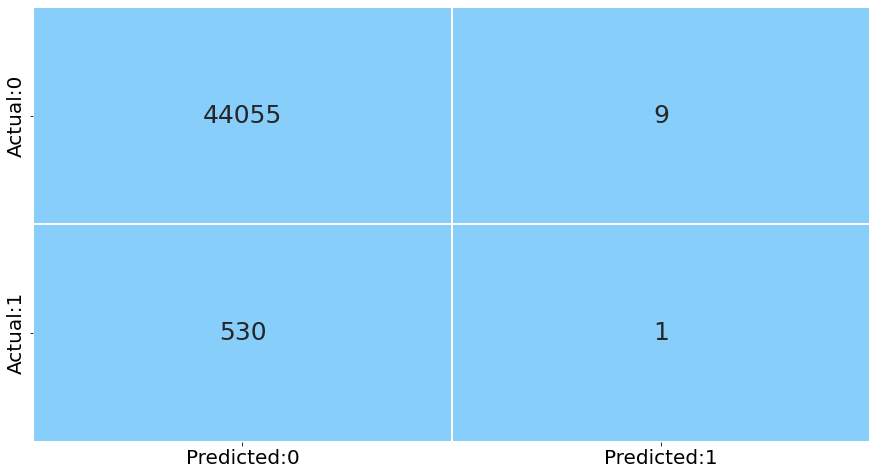

In [143]:

cm = confusion_matrix(y_test_full, y_pred_full_prob)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

Default accuracy score of the train data is:  0.9885356460121427
Default accuracy score of the test data is:  0.9879134432111223

Threshhold defined accuracy score of the train data is:  0.9885356460121427
Threshhold defined accuracy score of the test data is:  0.9879134432111223

F1 score of the train data is:  0.005833738454059309
F1 score of the test data is:  0.003696857670979667

roc_auc_score of the train data is:  0.8572873207625427
roc_auc_score of the test data is:  0.861133014707592

Classification report train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    176346
           1       0.25      0.00      0.01      2033

    accuracy                           0.99    178379
   macro avg       0.62      0.50      0.50    178379
weighted avg       0.98      0.99      0.98    178379



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44064
        

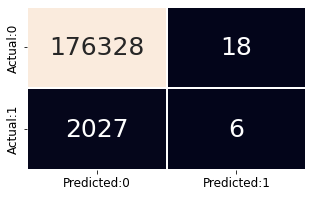


Confusion matrix test data


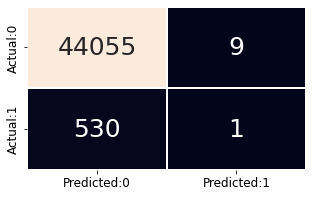


Recall(TPR) for test data = 0.0018832391713747645


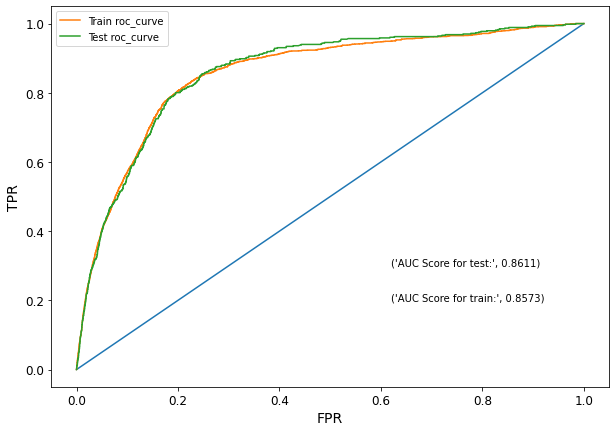

(0.005833738454059309,
 0.003696857670979667,
 0.8572873207625427,
 0.861133014707592,
 0.9885356460121427,
 0.9879134432111223,
 0.0018832391713747645)

In [144]:
model_eval(base_model_full,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)


In [145]:
update_score_card('Logistic Regression(Full Model)',base_model_full,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [146]:


kappa = cohen_kappa_score(y_test_full, y_pred_full_prob) 

# print the kappa value 
print('kappa value:',kappa)

kappa value: 0.003258100933951402


As we can see that considering all the features and only the statistical significant features makes no difference for 
our model hence we can go with only the statistical significant features.

In [208]:
update_score_card('Logistic Regression(Significant Features)',base_model_stat,xtrain=x_train_stat, xtest=x_test_stat, ytrain=y_train_stat, ytest=y_test_stat)

In [209]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258


In [85]:
vif = pd.DataFrame()


vif["VIF_Factor"] = [variance_inflation_factor(df_vif.select_dtypes(include='number').values, i) for i in range(df_vif.select_dtypes(include='number').shape[1])]


vif["Features"] = df_vif.select_dtypes(include='number').columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,54.764743,sales_6_month
1,37.911592,sales_9_month
2,23.632131,sales_3_month
3,18.527434,forecast_6_month
4,14.487121,forecast_9_month
5,7.558500,perf_12_month_avg
6,7.550551,perf_6_month_avg
7,7.518767,sales_1_month
8,5.839817,forecast_3_month
9,2.333294,min_bank


### Now let us consider PCA tranformations of Sales, forecast and performance since preiousy we saw that
### they have high correlation among them.

#  <a id='feature_engineering'></a>
## 6. Feature Engineering

In [153]:
df_num.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.353582,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,0.591350,0.903684,0.0
1,-0.440785,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-0.372301,-0.851553,0.0,-0.313378,-0.468057,0.0
2,-0.544057,0.259918,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-1.280194,-0.667787,0.0
3,-0.373742,-1.488275,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-0.516285,-0.372301,-0.851553,0.0,-1.659363,-0.804072,0.0
4,0.688939,2.386848,-0.490755,-0.659993,-0.744114,-0.787688,-0.804383,-0.964548,-1.061262,-1.113230,-0.851553,0.0,-0.873798,-0.969123,0.0


In [154]:
pca_sales=df_num.loc[:,['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
pca_sales.head()

,sales_1_month,sales_3_month,sales_6_month,sales_9_month
0,-0.804383,-0.964548,-1.061262,-1.113230
1,-0.804383,-0.964548,-1.061262,-0.372301
2,-0.804383,-0.964548,-1.061262,-1.113230
3,-0.804383,-0.964548,-0.516285,-0.372301
4,-0.804383,-0.964548,-1.061262,-1.113230


In [155]:
pca = PCA(n_components =1, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
pca_sales_1 = pca.fit_transform(pca_sales)
df_pca_sales = pd.DataFrame(data = pca_sales_1, columns = ['PC1_sales'])

# head() to display top five rows of the transformed data
df_pca_sales.head()

,PC1_sales
0,-1.974632
1,-1.602450
2,-1.974632
3,-1.326745
4,-1.974632


In [156]:
pca_forecast=df_num.loc[:,['forecast_3_month', 'forecast_6_month', 'forecast_9_month']]
pca_forecast.head()
pca_forecast_1 = pca.fit_transform(pca_forecast)
df_pca_forecast = pd.DataFrame(data = pca_forecast_1, columns = ['PC1_forecast'])

# head() to display top five rows of the transformed data
df_pca_forecast.head()

,PC1_forecast
0,-1.266229
1,-1.266229
2,-1.266229
3,-1.266229
4,-1.266229


In [157]:
pca_perf=df_num.loc[:,['perf_6_month_avg','perf_12_month_avg']]
pca_perf.head()
pca_perf_1 = pca.fit_transform(pca_perf)
df_pca_perf = pd.DataFrame(data = pca_perf_1, columns = ['PC1_perf'])

# head() to display top five rows of the transformed data
df_pca_perf.head()
#df_pca_perf.shape

,PC1_perf
0,-1.057149
1,0.552558
2,1.377431
3,1.741912
4,1.303142


In [158]:
X_new=X.drop(labels=['forecast_3_month', 'forecast_6_month', 'forecast_9_month',
                'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
               'perf_6_month_avg','perf_12_month_avg'],axis=1)
X_new.shape

(222974, 8)

In [210]:
df_pca=pd.concat([X_new,df_pca_sales,df_pca_forecast,df_pca_perf],axis=1)
df_pca.head()

,national_inv,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,deck_risk_Yes,ppap_risk_Yes,rev_stop_Yes,PC1_sales,PC1_forecast,PC1_perf
0,-0.353582,-0.490755,-0.851553,0.0,0.0,0,0,0,-1.974632,-1.266229,-1.057149
1,-0.440785,-0.490755,-0.851553,0.0,0.0,0,1,0,-1.602450,-1.266229,0.552558
2,-0.544057,-0.490755,-0.851553,0.0,0.0,0,0,0,-1.974632,-1.266229,1.377431
3,-0.373742,-0.490755,-0.851553,0.0,0.0,0,0,0,-1.326745,-1.266229,1.741912
4,0.688939,-0.490755,-0.851553,0.0,0.0,0,0,0,-1.974632,-1.266229,1.303142


In [269]:
vif = pd.DataFrame()


vif["VIF_Factor"] = [variance_inflation_factor(df_pca.select_dtypes(include='number').values, i) for i in range(df_pca.select_dtypes(include='number').shape[1])]


vif["Features"] = df_pca.select_dtypes(include='number').columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.143433,PC1_sales
1,2.319229,min_bank
2,2.078930,PC1_forecast
3,1.825081,in_transit_qty
4,1.342050,national_inv
5,1.089649,deck_risk_Yes
6,1.055385,PC1_perf
7,1.034036,ppap_risk_Yes
8,1.001296,rev_stop_Yes
9,NaN,pieces_past_due


In [160]:
df_pca.shape

(222974, 11)

In [211]:
y=df['went_on_backorder'].apply(lambda x :0 if x == 'No' else 1)
x=df_pca

In [212]:
x_train_pca , x_test_pca , y_train_pca , y_test_pca = train_test_split(df_pca, y1, random_state = 10, test_size = 0.2)
print('X_train', x_train_pca.shape)
print('y_train', y_train_pca.shape)

# print dimension of test set
print('X_test', x_test_pca.shape)
print('y_test', y_test_pca.shape)

X_train (178379, 11)
y_train (178379,)
X_test (44595, 11)
y_test (44595,)


In [213]:
from sklearn.linear_model import LogisticRegression
Logreg=LogisticRegression()
base_model_pca = Logreg.fit(x_train_pca,y_train_pca)
y_pred_pca=base_model_pca.predict(x_test_pca)
print(classification_report(y_test_pca,y_pred_pca))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     44064
           1       0.10      0.00      0.00       531

    accuracy                           0.99     44595
   macro avg       0.54      0.50      0.50     44595
weighted avg       0.98      0.99      0.98     44595



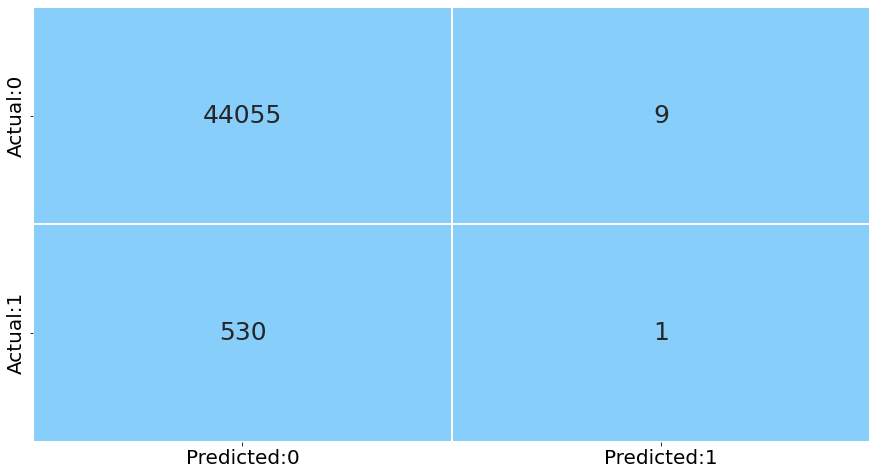

In [97]:
cm = confusion_matrix(y_test_pca,y_pred_pca)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

#### Now as we can see that still there is no improvement in our model Hence now we'll use SMOTE technique to balance our target variable and then fit a decision tree and check the model.

#  <a id='handling_imbalance'></a>
## 7. Handling imbalanced target

In [214]:
smote = SMOTE(random_state=10)

x_smote, y_smote = smote.fit_resample(df_pca, y1)

In [215]:
y_smote.value_counts()

0    220410
1    220410
Name: went_on_backorder, dtype: int64

In [216]:
x_smote.shape

(440820, 11)

Hence as we can see that with smote the number of rows just also increased and now our target variable is balanced.

In [238]:
x_train_full , x_test_full , y_train_full , y_test_full = train_test_split(x_smote, y_smote, random_state = 10, test_size = 0.2)
print('X_train', x_train_full.shape)
print('y_train', y_train_full.shape)

# print dimension of test set
print('X_test', x_test_full.shape)
print('y_test', y_test_full.shape)

X_train (352656, 11)
y_train (352656,)
X_test (88164, 11)
y_test (88164,)


#  <a id='Modelbuilding'></a>
## 8. Model Building 

#  <a id='withsmote'></a>
### 8.1. Logistic_Regression 

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
LogReg=LogisticRegression()

In [220]:
base_model_smote = LogReg.fit(x_train_full,y_train_full)

In [221]:
y_pred_smote=base_model_smote.predict(x_test_full)

In [ ]:
#Hence as we can see that now there is a considerable amount of improvement in our model. Let us also check the roc auc
#curve and the cohen kappa score 

In [109]:
kappa = cohen_kappa_score(y_test_full, y_pred_smote) 

# print the kappa value 
print('kappa value:',kappa)

kappa value: 0.6449665722041169


In [110]:
#Hence now we can see that our model has increased quite a bit because we can see that now our kappa statistic is coming
#0.64 which is almost a moderate level of inter rater agreement hence our model has improved upto a certain extent.
#Now let us try different models and check which model is giving the best result.

In [111]:
def get_train_report(model):
    
   
    train_pred = model.predict(x_train_full)

   
    return(classification_report(y_train_full, train_pred))

In [112]:

def get_test_report(model, test_data):
    
    test_pred = model.predict(test_data)

    
    return print((classification_report(y_test_full, test_pred)))

In [113]:
def plot_confusion_matrix(model):
    y_pred = model.predict(x_test_full)
    cm = confusion_matrix(y_test_full, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [114]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(x_test_full)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Backorder Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test_full, y_pred_prob),4)))

    plt.grid(True)

In [225]:
update_score_card('Logistic Regression(SMOTE,PCA)',base_model_smote,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [226]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577


Default accuracy score of the train data is:  0.8233377569075814
Default accuracy score of the test data is:  0.8228074951227258

Threshhold defined accuracy score of the train data is:  0.8233377569075814
Threshhold defined accuracy score of the test data is:  0.8228074951227258

F1 score of the train data is:  0.8264020664231319
F1 score of the test data is:  0.8266495039836658

roc_auc_score of the train data is:  0.8932002615354264
roc_auc_score of the test data is:  0.8923899617939123

Classification report train
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    176441
           1       0.81      0.84      0.83    176215

    accuracy                           0.82    352656
   macro avg       0.82      0.82      0.82    352656
weighted avg       0.82      0.82      0.82    352656



Classification report test
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     43969
           

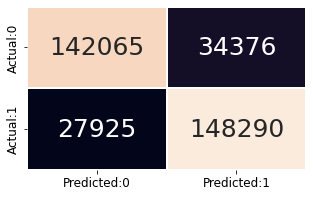


Confusion matrix test data


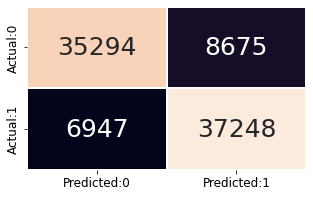


Recall(TPR) for test data = 0.8428102726552777


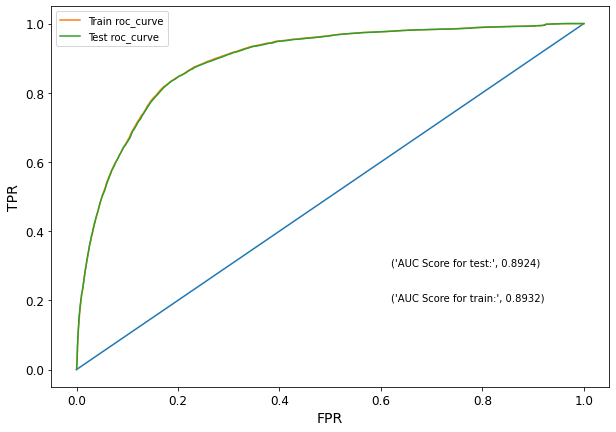

(0.8264020664231319,
 0.8266495039836658,
 0.8932002615354264,
 0.8923899617939123,
 0.8233377569075814,
 0.8228074951227258,
 0.8428102726552777)

In [239]:
model_eval(base_model_smote,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

#  <a id='decision_tree'></a>
### 8.2. Decision Tree 

In [240]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_train_full, y_train_full)

Default accuracy score of the train data is:  0.9988062020779457
Default accuracy score of the test data is:  0.9755796016514677

Threshhold defined accuracy score of the train data is:  0.9988062020779457
Threshhold defined accuracy score of the test data is:  0.9754434916746064

F1 score of the train data is:  0.9988056839232574
F1 score of the test data is:  0.9755706757839387

roc_auc_score of the train data is:  0.9999948242530275
roc_auc_score of the test data is:  0.9763261000790827

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176441
           1       1.00      1.00      1.00    176215

    accuracy                           1.00    352656
   macro avg       1.00      1.00      1.00    352656
weighted avg       1.00      1.00      1.00    352656



Classification report test
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     43969
           

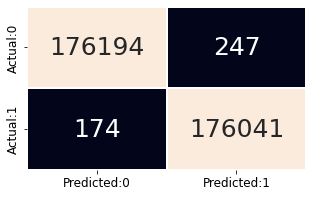


Confusion matrix test data


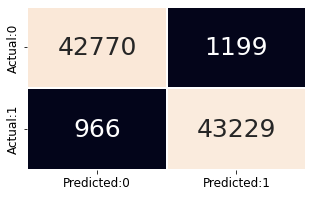


Recall(TPR) for test data = 0.9781423237922842


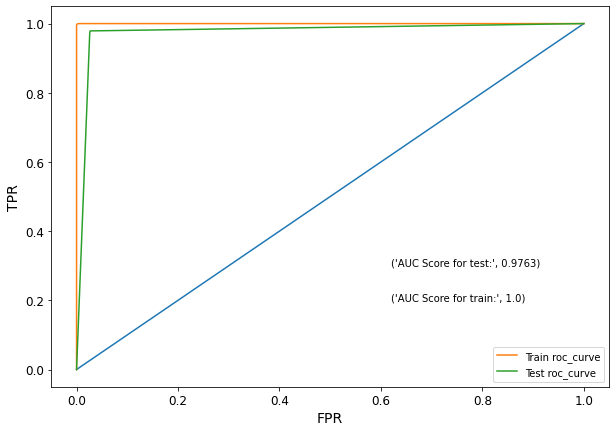

(0.9988056839232574,
 0.9755706757839387,
 0.9999948242530275,
 0.9763261000790827,
 0.9988062020779457,
 0.9755796016514677,
 0.9781423237922842)

In [241]:
model_eval(decision_tree,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [242]:
update_score_card('Decision Tree',decision_tree,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [243]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886


#  <a id='random_forest_classifier'></a>
### 8.3. Random Forest Classifier

In [244]:
rfc=RandomForestClassifier()
random_forest=rfc.fit(x_train_full,y_train_full)


Default accuracy score of the train data is:  0.9988033664534277
Default accuracy score of the test data is:  0.9829635678961934

Threshhold defined accuracy score of the train data is:  0.9988033664534277
Threshhold defined accuracy score of the test data is:  0.9828047729231886

F1 score of the train data is:  0.9988026806335012
F1 score of the test data is:  0.9829379192364831

roc_auc_score of the train data is:  0.9999554295953827
roc_auc_score of the test data is:  0.9980545658536417

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176441
           1       1.00      1.00      1.00    176215

    accuracy                           1.00    352656
   macro avg       1.00      1.00      1.00    352656
weighted avg       1.00      1.00      1.00    352656



Classification report test
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     43969
           

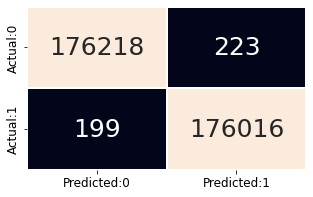


Confusion matrix test data


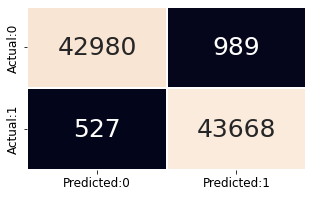


Recall(TPR) for test data = 0.9880755741599728


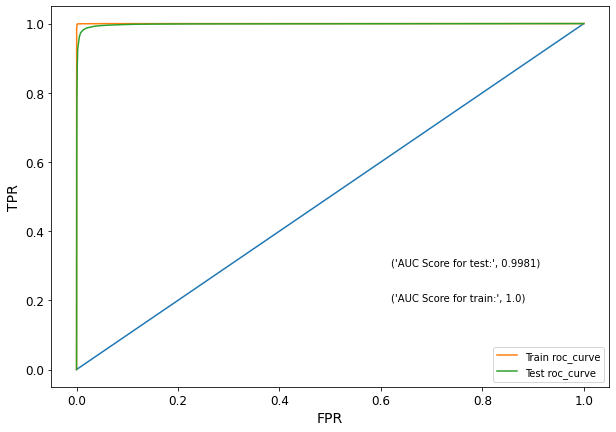

(0.9988026806335012,
 0.9829379192364831,
 0.9999554295953827,
 0.9980545658536417,
 0.9988033664534277,
 0.9829635678961934,
 0.9880755741599728)

In [245]:
model_eval(random_forest,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [247]:
update_score_card('Random Forest classifer',random_forest,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [248]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886
4,Random Forest classifer,0.999955,0.998020,0.998803,0.983063,0.988257,0.965858


In [ ]:
#Hence as we can see that Random forest is giving us the best model untill now. 

#  <a id='adaboost'></a>
### 8.4. Adaboost

In [249]:
ada_boost = AdaBoostClassifier()

ada_boost.fit(x_train_full, y_train_full)

AdaBoostClassifier()

Default accuracy score of the train data is:  0.8686708860759493
Default accuracy score of the test data is:  0.8681094324213965

Threshhold defined accuracy score of the train data is:  0.8686708860759493
Threshhold defined accuracy score of the test data is:  0.8681094324213965

F1 score of the train data is:  0.8699381058827493
F1 score of the test data is:  0.8700084961767206

roc_auc_score of the train data is:  0.9426074160913481
roc_auc_score of the test data is:  0.942186017670952

Classification report train
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    176441
           1       0.86      0.88      0.87    176215

    accuracy                           0.87    352656
   macro avg       0.87      0.87      0.87    352656
weighted avg       0.87      0.87      0.87    352656



Classification report test
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     43969
           1

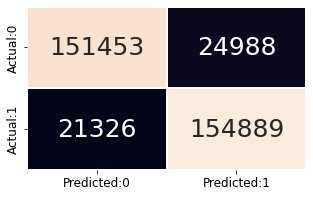


Confusion matrix test data


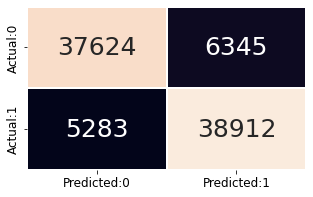


Recall(TPR) for test data = 0.8804615906776785


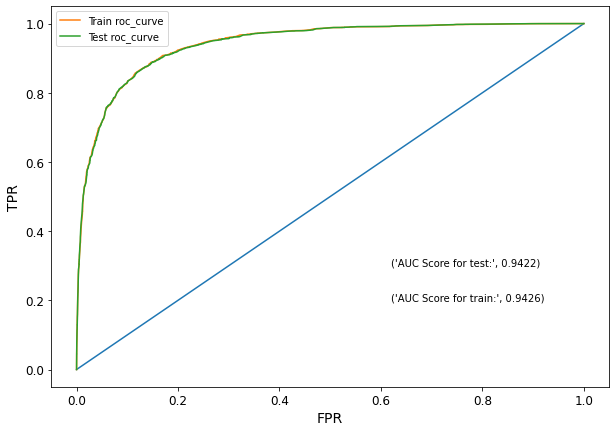

(0.8699381058827493,
 0.8700084961767206,
 0.9426074160913481,
 0.942186017670952,
 0.8686708860759493,
 0.8681094324213965,
 0.8804615906776785)

In [250]:
model_eval(ada_boost,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [251]:
update_score_card('Ada Boost Classifier',ada_boost,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [252]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886
4,Random Forest classifer,0.999955,0.998020,0.998803,0.983063,0.988257,0.965858
5,Ada Boost Classifier,0.942607,0.942186,0.869938,0.870008,0.880462,0.736201


In [ ]:
#Hence as compared to a random forest we can observe that in ada boost there is a little bit of underfitting.

#  <a id='GradientBoostingClassifier'></a>
### 8.5. Gradient_Boosting Classifier

In [253]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(x_train_full, y_train_full)

GradientBoostingClassifier()

Default accuracy score of the train data is:  0.9022645297400299
Default accuracy score of the test data is:  0.9004582369220997

Threshhold defined accuracy score of the train data is:  0.9022645297400299
Threshhold defined accuracy score of the test data is:  0.9004582369220997

F1 score of the train data is:  0.9028329466422718
F1 score of the test data is:  0.9014353422134369

roc_auc_score of the train data is:  0.9662367183372033
roc_auc_score of the test data is:  0.9657319224159697

Classification report train
              precision    recall  f1-score   support

           0       0.91      0.90      0.90    176441
           1       0.90      0.91      0.90    176215

    accuracy                           0.90    352656
   macro avg       0.90      0.90      0.90    352656
weighted avg       0.90      0.90      0.90    352656



Classification report test
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     43969
           

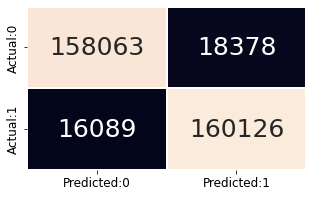


Confusion matrix test data


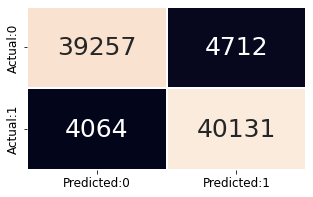


Recall(TPR) for test data = 0.9080438963683675


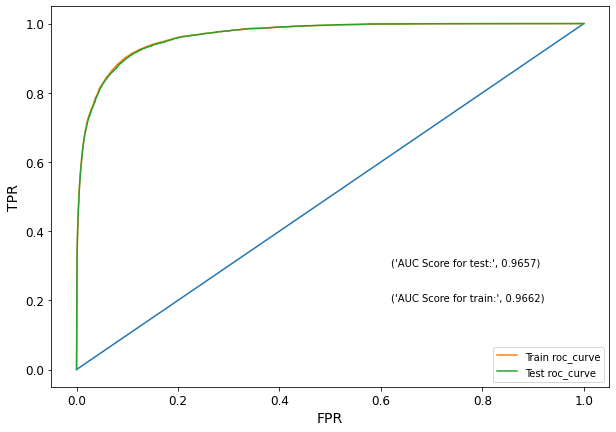

(0.9028329466422718,
 0.9014353422134369,
 0.9662367183372033,
 0.9657319224159697,
 0.9022645297400299,
 0.9004582369220997,
 0.9080438963683675)

In [254]:
model_eval(gradient_boost,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [255]:
update_score_card('Gradient Boost Classifer',gradient_boost,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [256]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886
4,Random Forest classifer,0.999955,0.998020,0.998803,0.983063,0.988257,0.965858
5,Ada Boost Classifier,0.942607,0.942186,0.869938,0.870008,0.880462,0.736201
6,Gradient Boost Classifer,0.966237,0.965732,0.902833,0.901435,0.908044,0.800908


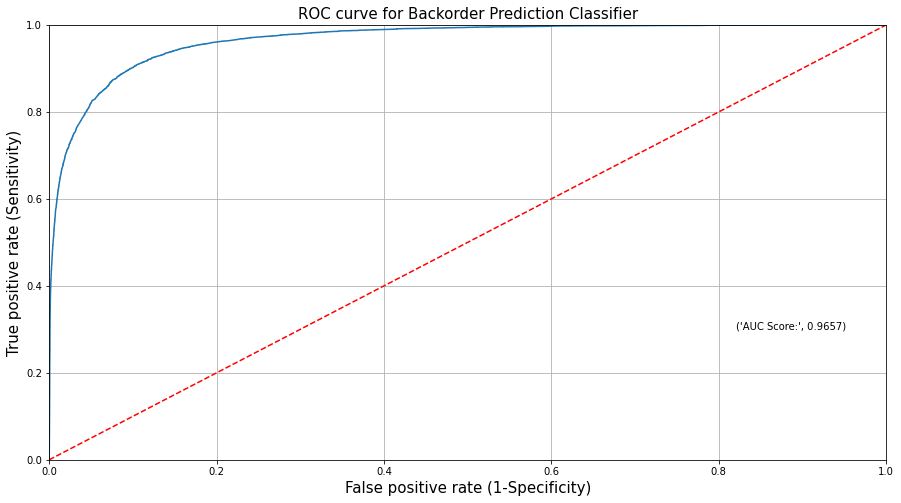

#  <a id='XGBoost'></a>
### 8.6. XGBoost

In [257]:
xgb=XGBClassifier()

In [267]:
xgboost=xgb.fit(x_train_full,y_train_full)

Default accuracy score of the train data is:  0.9756873553831495
Default accuracy score of the test data is:  0.972687264643165

Threshhold defined accuracy score of the train data is:  0.9756873553831495
Threshhold defined accuracy score of the test data is:  0.972687264643165

F1 score of the train data is:  0.9756672077737795
F1 score of the test data is:  0.972769422141807

roc_auc_score of the train data is:  0.9972764449092985
roc_auc_score of the test data is:  0.9966972822553289

Classification report train
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    176441
           1       0.98      0.98      0.98    176215

    accuracy                           0.98    352656
   macro avg       0.98      0.98      0.98    352656
weighted avg       0.98      0.98      0.98    352656



Classification report test
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43969
           1  

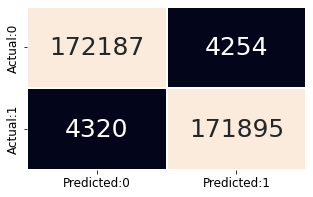


Confusion matrix test data


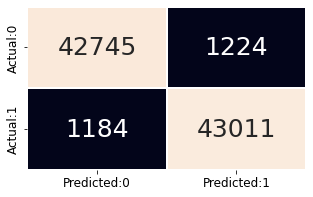


Recall(TPR) for test data = 0.9732096390994457


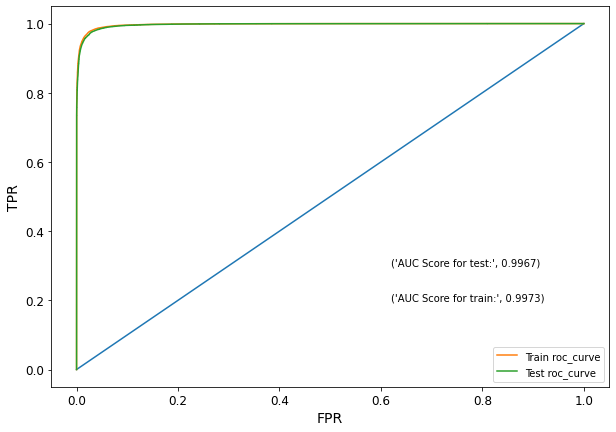

(0.9756672077737795,
 0.972769422141807,
 0.9972764449092985,
 0.9966972822553289,
 0.9756873553831495,
 0.972687264643165,
 0.9732096390994457)

In [258]:
model_eval(xgb,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [259]:
update_score_card('XG Boost Classifer',xgb,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [260]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886
4,Random Forest classifer,0.999955,0.998020,0.998803,0.983063,0.988257,0.965858
5,Ada Boost Classifier,0.942607,0.942186,0.869938,0.870008,0.880462,0.736201
6,Gradient Boost Classifer,0.966237,0.965732,0.902833,0.901435,0.908044,0.800908
7,XG Boost Classifer,0.997276,0.996697,0.975667,0.972769,0.973210,0.945374


In [160]:
#Hence we can conclude that the best model which we are getting is random forest and also the xgboost model. 
#Now let us check the cohen kappa score for these two models.

In [95]:
y_pred = random_forest.predict(x_test_full)
kappa = cohen_kappa_score(y_test_full, y_pred) 

# print the kappa value 
print('kappa value:',kappa)

kappa value: 0.9714387693908961


In [96]:
y_pred1 = xgboost.predict(x_test_full)
kappa = cohen_kappa_score(y_test_full, y_pred1) 

# print the kappa value 
print('kappa value:',kappa)

kappa value: 0.947755402710459


#  <a id='feature_importance'></a>
## 9. Feature Importance 

In [ ]:
#Now let us check the feature importance for the above two models

In [ ]:
# Feature Importance of Random Forest

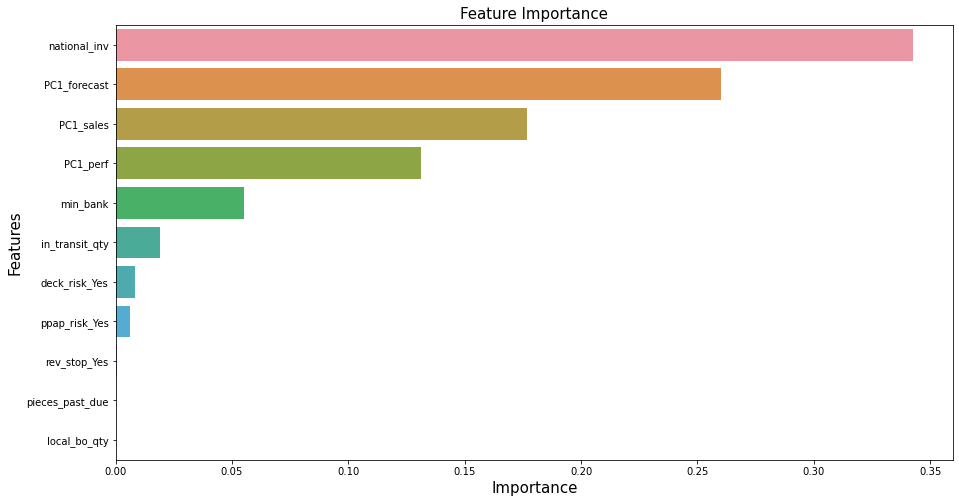

In [274]:
important_features = pd.DataFrame({'Features': x_train_full.columns, 
                                   'Importance': random_forest.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


plt.show()

In [275]:
important_features

,Features,Importance
0,national_inv,0.342536
9,PC1_forecast,0.260145
8,PC1_sales,0.176926
10,PC1_perf,0.131356
2,min_bank,0.054919
1,in_transit_qty,0.019218
5,deck_risk_Yes,0.008428
6,ppap_risk_Yes,0.006094
7,rev_stop_Yes,0.000377
3,pieces_past_due,0.000000


In [271]:
# Feature Importance of Decision Tree

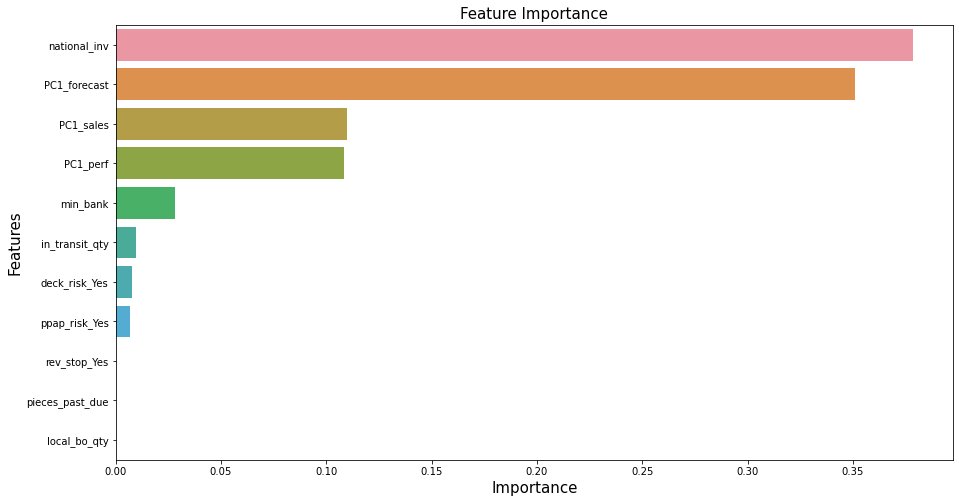

In [270]:
important_features = pd.DataFrame({'Features': x_train_full.columns, 
                                   'Importance': decision_tree.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


# display the plot
plt.show()

In [273]:
### Feature Importance of XG Boost Classifier

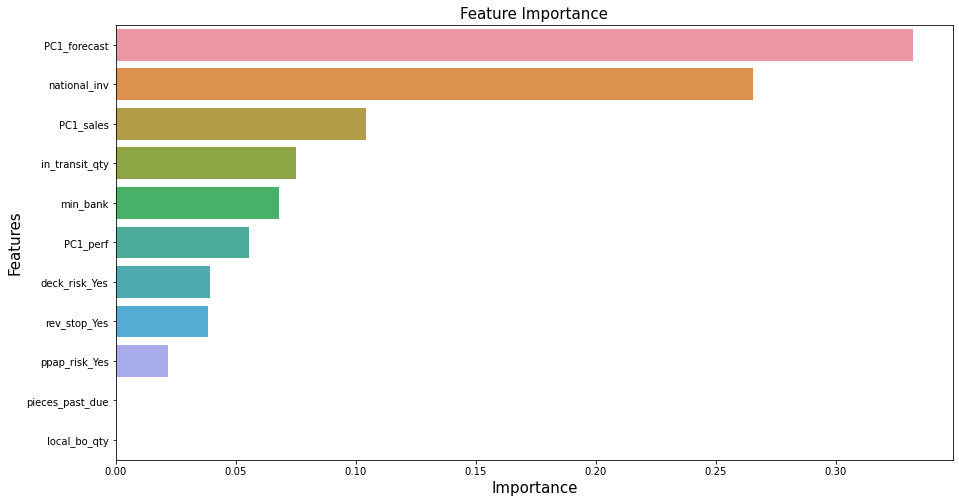

In [272]:
important_features = pd.DataFrame({'Features': x_train_full.columns, 
                                   'Importance': xgboost.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)


# display the plot
plt.show()

In [ ]:
#Hence we can see for both of the models the forecast and inventory data seems to be the most important 

In [163]:
#Now as we saw earlier that the cohen kappa score is better for the random forest model so lets 
#tune the hyperparameters for the same

#  <a id='hyperparameter_tuning'></a>
## 10. Hyperparameter Tuning 

In [97]:
x_smote.head()

,national_inv,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,deck_risk_Yes,ppap_risk_Yes,rev_stop_Yes,PC1_sales,PC1_forecast,PC1_perf
0,-0.086794,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,-1.974895,-1.268065,-1.057149
1,-0.092737,-0.486577,-0.855187,-0.116406,-0.111252,0,1,0,-1.600075,-1.268065,0.552558
2,-0.098852,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,-1.974895,-1.268065,1.377431
3,-0.088219,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,-1.323148,-1.268065,1.741912
4,0.010169,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,-1.974895,-1.268065,1.303142


In [98]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: went_on_backorder, dtype: int64

In [99]:
x1 = x_smote.sample(n = 1000)
y1 = y_smote.sample(n=1000)

In [100]:
x1.reset_index(drop = True,inplace = True)
x1.head()

,national_inv,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,deck_risk_Yes,ppap_risk_Yes,rev_stop_Yes,PC1_sales,PC1_forecast,PC1_perf
0,-0.095446,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,1.285195,2.139214,-1.551613
1,-0.054049,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,1.950201,-1.268065,-1.854096
2,-0.022201,2.209335,1.744188,8.590599,-0.111252,0,0,0,3.363926,2.959141,2.705204
3,0.086318,2.202621,1.715128,-0.116406,-0.111252,0,0,0,3.321366,1.412318,-0.553964
4,-0.095493,-0.486577,-0.855187,-0.116406,-0.111252,0,0,0,1.081363,0.222637,-1.596297


In [101]:
y1.reset_index(drop = True , inplace = True)
y1.head()

0    0
1    1
2    1
3    0
4    1
Name: went_on_backorder, dtype: int64

In [102]:
x_train_full , x_test_full , y_train_full , y_test_full = train_test_split(x1, y1, random_state = 10, test_size = 0.2)
print('X_train', x_train_full.shape)
print('y_train', y_train_full.shape)

# print dimension of test set
print('X_test', x_test_full.shape)
print('y_test', y_test_full.shape)

X_train (800, 11)
y_train (800,)
X_test (200, 11)
y_test (200,)


In [196]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(x_train_full, y_train_full)


print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10} 



In [197]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [20, 40, 60],
                     'max_depth': [20, 25],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [3, 7, 9],
                     'min_samples_leaf': [2, 6, 10],
                     'max_leaf_nodes': [5, 7, 10]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(x_train_full, y_train_full)


print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 60} 



In [198]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [30, 50, 70],
                     'max_depth': [30, 35],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [4, 8, 10],
                     'min_samples_leaf': [3, 7, 12],
                     'max_leaf_nodes': [6, 9, 12]}]
 

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(x_train_full, y_train_full)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 70} 



In [103]:
#Now let us fit the model using an average of the numerical values which came above for the three grid search CV output
#and the once which is occuring most number of times like max_features. Now since based on our cohen kappa score the 
#random forest is the best model so let us use grid search parameters to fit our final model.

In [104]:
x_train_full , x_test_full , y_train_full , y_test_full = train_test_split(x_smote, y_smote, random_state = 10, test_size = 0.2)
print('X_train', x_train_full.shape)
print('y_train', y_train_full.shape)

print('X_test', x_test_full.shape)
print('y_test', y_test_full.shape)

X_train (352656, 11)
y_train (352656,)
X_test (88164, 11)
y_test (88164,)


In [261]:
rfc_1=RandomForestClassifier(criterion = 'gini',max_depth = 30,max_features = 'sqrt',max_leaf_nodes = 8,
                          min_samples_leaf = 5,min_samples_split=7,n_estimators = 70)

Default accuracy score of the train data is:  0.8432920466403521
Default accuracy score of the test data is:  0.8408647520529922

Threshhold defined accuracy score of the train data is:  0.8432920466403521
Threshhold defined accuracy score of the test data is:  0.8408647520529922

F1 score of the train data is:  0.8417991114368159
F1 score of the test data is:  0.8400264532165743

roc_auc_score of the train data is:  0.9175377707031884
roc_auc_score of the test data is:  0.9153202768560333

Classification report train
              precision    recall  f1-score   support

           0       0.84      0.85      0.84    176441
           1       0.85      0.83      0.84    176215

    accuracy                           0.84    352656
   macro avg       0.84      0.84      0.84    352656
weighted avg       0.84      0.84      0.84    352656



Classification report test
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     43969
           

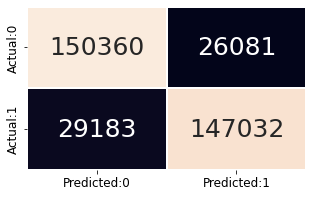


Confusion matrix test data


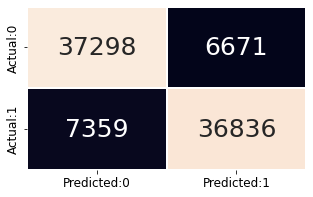


Recall(TPR) for test data = 0.833487951125693


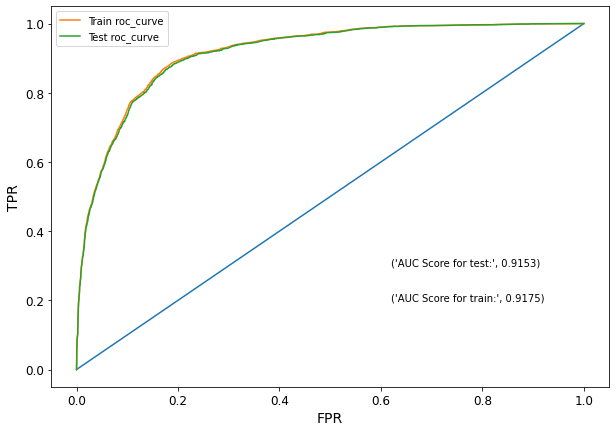

(0.8417991114368159,
 0.8400264532165743,
 0.9175377707031884,
 0.9153202768560333,
 0.8432920466403521,
 0.8408647520529922,
 0.833487951125693)

In [262]:
model_eval(rfc_1,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [263]:
update_score_card('Random Forest Classifier with tuned parameters',rfc_1,xtrain=x_train_full, xtest=x_test_full, ytrain=y_train_full, ytest=y_test_full)

In [264]:
score_card

,Model_Name,Train ROC,Test ROC,Train f1_Score,Test_f1_Score,Test_Recall,Cohen-Kappa-Score
0,Logistic Regression(Full Model),0.857287,0.861133,0.005834,0.003697,0.001883,0.003258
1,Logistic Regression(Significant Features),0.855449,0.859050,0.005837,0.003697,0.001883,0.003258
2,"Logistic Regression(SMOTE,PCA)",0.893200,0.892390,0.826402,0.826650,0.842810,0.645577
3,Decision Tree,0.999995,0.976326,0.998806,0.975571,0.978142,0.950886
4,Random Forest classifer,0.999955,0.998020,0.998803,0.983063,0.988257,0.965858
5,Ada Boost Classifier,0.942607,0.942186,0.869938,0.870008,0.880462,0.736201
6,Gradient Boost Classifer,0.966237,0.965732,0.902833,0.901435,0.908044,0.800908
7,XG Boost Classifer,0.997276,0.996697,0.975667,0.972769,0.973210,0.945374
8,Random Forest Classifier with tuned parameters,0.918114,0.916130,0.843923,0.841469,0.847743,0.679742


In [ ]:
#Hence as we can see that after tuning hyperparameter we can see that the model is a bit underfit as compared to our 
#initial Random Forest model. 